In [1]:
import pandas as pd

## Merging

#### Example

In [2]:
taxi_owners = pd.read_pickle('data/taxi_owners.p')
taxi_veh = pd.read_pickle('data/taxi_vehicles.p')

In [3]:
print(taxi_owners.head())
print(50*'#')
print(taxi_veh.head())

     rid   vid           owner                 address    zip
0  T6285  6285  AGEAN TAXI LLC     4536 N. ELSTON AVE.  60630
1  T4862  4862    MANGIB CORP.  5717 N. WASHTENAW AVE.  60659
2  T1495  1495   FUNRIDE, INC.     3351 W. ADDISON ST.  60618
3  T4231  4231    ALQUSH CORP.   6611 N. CAMPBELL AVE.  60645
4  T5971  5971  EUNIFFORD INC.     3351 W. ADDISON ST.  60618
##################################################
    vid    make   model  year fuel_type                owner
0  2767  TOYOTA   CAMRY  2013    HYBRID       SEYED M. BADRI
1  1411  TOYOTA    RAV4  2017    HYBRID          DESZY CORP.
2  6500  NISSAN  SENTRA  2019  GASOLINE       AGAPH CAB CORP
3  2746  TOYOTA   CAMRY  2013    HYBRID  MIDWEST CAB CO, INC
4  5922  TOYOTA   CAMRY  2013    HYBRID       SUMETTI CAB CO


In [4]:
taxi_own_veh = taxi_owners.merge(taxi_veh, on = 'vid')
taxi_own_veh.columns

Index(['rid', 'vid', 'owner_x', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_y'],
      dtype='object')

In [5]:
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own','_veh'))
taxi_own_veh.columns

Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')

In [6]:
taxi_own_veh['fuel_type'].value_counts()

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64

#### Example

In [7]:
licenses = pd.read_pickle('data/licenses.p')
biz_owners = pd.read_pickle('data/business_owners.p')
print(licenses.head())
print(50*'#')
print(biz_owners.head())

  account ward  aid                   business               address    zip
0  307071    3  743       REGGIE'S BAR & GRILL       2105 S STATE ST  60616
1      10   10  829                 HONEYBEERS   13200 S HOUSTON AVE  60633
2   10002   14  775                CELINA DELI     5089 S ARCHER AVE  60632
3   10005   12  NaN  KRAFT FOODS NORTH AMERICA        2005 W 43RD ST  60609
4   10044   44  638  NEYBOUR'S TAVERN & GRILLE  3651 N SOUTHPORT AVE  60613
##################################################
  account first_name  last_name      title
0      10      PEARL    SHERMAN  PRESIDENT
1      10      PEARL    SHERMAN  SECRETARY
2   10002     WALTER     MROZEK    PARTNER
3   10002     CELINA     BYRDAK    PARTNER
4   10005      IRENE  ROSENFELD  PRESIDENT


A business may have one or multiple owners.

In [9]:
licenses_owners = licenses.merge(biz_owners, on = 'account')
licenses_owners.head(20)

,account,ward,aid,business,address,zip,first_name,last_name,title
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616,ROBERT,GLICK,MEMBER
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633,PEARL,SHERMAN,PRESIDENT
2,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633,PEARL,SHERMAN,SECRETARY
3,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632,WALTER,MROZEK,PARTNER
4,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632,CELINA,BYRDAK,PARTNER
5,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609,IRENE,ROSENFELD,PRESIDENT
6,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609,CAROL,WARD,SECRETARY
7,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613,JESSICA,DEVOS,SECRETARY
8,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613,CURTIS,JENNETTE,PRESIDENT
9,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613,BRIAN,HAINES,VICE PRESIDENT


In [10]:
counted_df = licenses_owners.groupby('title').agg({'account':'count'})
sorted_df = counted_df.sort_values(by = 'account', ascending = False)
sorted_df.head()

,account
title,
PRESIDENT,6259
SECRETARY,5205
SOLE PROPRIETOR,1658
OTHER,1200
VICE PRESIDENT,970


#### Example

In [11]:
cal = pd.read_pickle('data/cta_calendar.p')
ridership = pd.read_pickle('data/cta_ridership.p')
stations = pd.read_pickle('data/stations.p')
print(cal.head())
print(50*'#')
print(ridership.head())
print(50*'#')
print(stations.head())

   year  month  day        day_type
0  2019      1    1  Sunday/Holiday
1  2019      1    2         Weekday
2  2019      1    3         Weekday
3  2019      1    4         Weekday
4  2019      1    5        Saturday
##################################################
  station_id  year  month  day  rides
0      40010  2019      1    1    576
1      40010  2019      1    2   1457
2      40010  2019      1    3   1543
3      40010  2019      1    4   1621
4      40010  2019      1    5    719
##################################################
  station_id        station_name                 location
0      40010  Austin-Forest Park  (41.870851, -87.776812)
1      40020         Harlem-Lake  (41.886848, -87.803176)
2      40030        Pulaski-Lake  (41.885412, -87.725404)
3      40040        Quincy/Wells   (41.878723, -87.63374)
4      40050               Davis   (42.04771, -87.683543)


Find the total number of rides provided to passengers passing through the Wilson station (**station_name == 'Wilson'**) when riding Chicago's public transportation system on weekdays (**day_type == 'Weekday'**) in July (**month == 7**). 

In [12]:
ridership_cal = ridership.merge(cal, on = ['year', 'month', 'day'])
ridership_cal.head()

,station_id,year,month,day,rides,day_type
0,40010,2019,1,1,576,Sunday/Holiday
1,40080,2019,1,1,1839,Sunday/Holiday
2,40770,2019,1,1,2724,Sunday/Holiday
3,40120,2019,1,1,754,Sunday/Holiday
4,40540,2019,1,1,2175,Sunday/Holiday


In [13]:
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
                        .merge(stations, on = 'station_id')
ridership_cal_stations.head()

,station_id,year,month,day,rides,day_type,station_name,location
0,40010,2019,1,1,576,Sunday/Holiday,Austin-Forest Park,"(41.870851, -87.776812)"
1,40010,2019,1,2,1457,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
2,40010,2019,1,3,1543,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
3,40010,2019,1,4,1621,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
4,40010,2019,1,5,719,Saturday,Austin-Forest Park,"(41.870851, -87.776812)"


In [14]:
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

ridership_cal_stations.loc[filter_criteria, 'rides'].sum()

140005

Wilson station had 140,005 riders during weekdays in July.

#### Example

In [15]:
print(licenses.head())
wards = pd.read_pickle('data/ward.p')
print(50*'#')
print(wards.head())
zip_demo = pd.read_pickle('data/zip_demo.p')
print(50*'#')
print(zip_demo.head())

  account ward  aid                   business               address    zip
0  307071    3  743       REGGIE'S BAR & GRILL       2105 S STATE ST  60616
1      10   10  829                 HONEYBEERS   13200 S HOUSTON AVE  60633
2   10002   14  775                CELINA DELI     5089 S ARCHER AVE  60632
3   10005   12  NaN  KRAFT FOODS NORTH AMERICA        2005 W 43RD ST  60609
4   10044   44  638  NEYBOUR'S TAVERN & GRILLE  3651 N SOUTHPORT AVE  60613
##################################################
  ward            alderman                          address    zip
0    1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647
1    2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622
2    3          Pat Dowell          5046 SOUTH STATE STREET  60609
3    4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616
4    5  Leslie A. Hairston            2325 EAST 71ST STREET  60649
##################################################
     zip  income
0  60630   70122
1  606

In [16]:
licenses_zip_ward = licenses.merge(zip_demo, on = 'zip') \
                    .merge(wards, on = 'ward')
licenses_zip_ward.groupby('alderman').agg({'income':'median'})

,income
alderman,
Ameya Pawar,66246
Anthony A. Beale,38206
Anthony V. Napolitano,82226
Ariel E. Reyboras,41307
Brendan Reilly,110215
Brian Hopkins,87143
Carlos Ramirez-Rosa,66246
Carrie M. Austin,38206
Chris Taliaferro,55566


In [17]:
licenses_zip_ward[licenses_zip_ward['alderman'] == 'Scott Waguespack']

,account,ward,aid,business,address_x,zip_x,income,alderman,address_y,zip_y
6164,14829,32,775,LE BOUCHON,1958 N DAMEN AVE,60647,68223,Scott Waguespack,2657 NORTH CLYBOURN AVENUE,60614
6165,15398,32,NaN,"LITTLEROCK CONSTRUCTION, INC",2508 N CAMPBELL AVE,60647,68223,Scott Waguespack,2657 NORTH CLYBOURN AVENUE,60614
6166,15857,32,775,TACO'S Y SALSA,2957 W DIVERSEY AVE 1ST,60647,68223,Scott Waguespack,2657 NORTH CLYBOURN AVENUE,60614
6167,16296,32,638,EL CID TACOS #2,2645 N KEDZIE AVE 1 & 2,60647,68223,Scott Waguespack,2657 NORTH CLYBOURN AVENUE,60614
6168,17237,32,775,MIKO'S,1846 N DAMEN AVE,60647,68223,Scott Waguespack,2657 NORTH CLYBOURN AVENUE,60614
...,...,...,...,...,...,...,...,...,...,...
6407,63784,32,829,LOTTIE'S PUB,1925 W CORTLAND ST 1ST,60622,87143,Scott Waguespack,2657 NORTH CLYBOURN AVENUE,60614
6408,6647,32,NaN,B & W BOOKSTORES INC,1548 W NORTH AVE,60622,87143,Scott Waguespack,2657 NORTH CLYBOURN AVENUE,60614
6409,6737,32,NaN,HOWARD ORLOFF JAGUAR VOLVO INC,1924 N PAULINA ST,60622,87143,Scott Waguespack,2657 NORTH CLYBOURN AVENUE,60614
6410,85964,32,817,SIPI METALS CORP,1720 N ELSTON AVE 1,60622,87143,Scott Waguespack,2657 NORTH CLYBOURN AVENUE,60614


In [18]:
#Incorrect way
second_way = wards.merge(zip_demo, on = 'zip')
second_way.groupby('alderman')['income'].median() #is a series and second_way.groupby('alderman').agg({'income':'median'}) is a df

#WHY IS INCORRECT????? (Hint: check de previous line)

alderman
Ameya Pawar                   66246
Anthony A. Beale              38206
Anthony V. Napolitano         82226
Ariel E. Reyboras             33959
Brendan Reilly               104629
Brian Hopkins                 87143
Carlos Ramirez-Rosa           68223
Carrie M. Austin              38206
Chris Taliaferro              41307
Daniel "Danny" Solis          41226
David H. Moore                27573
Deborah Mell                  66246
Debra L. Silverstein          50554
Derrick G. Curtis             65770
Edward M. Burke               42335
Emma M. Mitts                 36283
George Cardenas               41226
Gilbert Villegas              92240
Gregory I. Mitchell           38417
Harry Osterman                50488
Howard B. Brookins, Jr.       33304
James Cappleman               50488
Jason C. Ervin                38756
Joe Moore                     39163
John S. Arena                 70122
Leslie A. Hairston            24941
Margaret Laurino              70122
Marty Quinn        

In [19]:
licenses_zip_ward = licenses.merge(wards, on = 'ward', suffixes = ('_lic', '_wards')) \
                    .merge(zip_demo, left_on = 'zip_wards', right_on = 'zip')
print(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))
#THEY ARE NOT THE SAME
licenses_zip_ward2 = licenses.merge(wards, on = 'ward', suffixes = ('_lic', '_wards')) \
                    .merge(zip_demo, left_on = 'zip_lic', right_on = 'zip')
print(licenses_zip_ward2.groupby('alderman').agg({'income':'median'}))

                           income
alderman                         
Ameya Pawar                 66246
Anthony A. Beale            38206
Anthony V. Napolitano       82226
Ariel E. Reyboras           33959
Brendan Reilly             104629
Brian Hopkins               87143
Carlos Ramirez-Rosa         68223
Carrie M. Austin            38206
Chris Taliaferro            41307
Daniel "Danny" Solis        41226
David H. Moore              27573
Deborah Mell                66246
Debra L. Silverstein        50554
Derrick G. Curtis           65770
Edward M. Burke             42335
Emma M. Mitts               36283
George Cardenas             41226
Gilbert Villegas            92240
Gregory I. Mitchell         38417
Harry Osterman              50488
Howard B. Brookins, Jr.     33304
James Cappleman             50488
Jason C. Ervin              38756
Joe Moore                   39163
John S. Arena               70122
Leslie A. Hairston          24941
Margaret Laurino            70122
Marty Quinn   

In [20]:
licenses_zip_ward = licenses.merge(zip_demo, on = 'zip') \
                    .merge(wards, on = 'ward')
licenses_zip_ward.groupby('alderman').agg({'income':'median'})

,income
alderman,
Ameya Pawar,66246
Anthony A. Beale,38206
Anthony V. Napolitano,82226
Ariel E. Reyboras,41307
Brendan Reilly,110215
Brian Hopkins,87143
Carlos Ramirez-Rosa,66246
Carrie M. Austin,38206
Chris Taliaferro,55566


**CONLUSION : The order of merging matters!!!!**

#### Example

In [21]:
census = pd.read_pickle('data/census.p')
land_use = pd.read_pickle('data/land_use.p')
print(census.head())
print(50*'#')
print(land_use.head())
print(50*'#')
print(licenses.head())

  ward  pop_2000  pop_2010 change                                  address  \
0    1     52951     56149     6%              2765 WEST SAINT MARY STREET   
1    2     54361     55805     3%                 WM WASTE MANAGEMENT 1500   
2    3     40385     53039    31%                      17 EAST 38TH STREET   
3    4     51953     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL   
4    5     55302     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE   

     zip  
0  60647  
1  60622  
2  60653  
3  60653  
4  60637  
##################################################
  ward  residential  commercial  industrial  vacant  other
0    1           41           9           2       2     46
1    2           31          11           6       2     50
2    3           20           5           3      13     59
3    4           22          13           0       7     58
4    5           25           3           1       3     68
##################################################
  account

In [22]:
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))
land_cen_lic.head()

,ward,residential,commercial,industrial,vacant,other,pop_2000,pop_2010,change,address_cen,zip_cen,account,aid,business,address_lic,zip_lic
0,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622
1,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14446,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622
2,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647
3,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14987,NaN,MR. BROWN'S LOUNGE,2301 W CHICAGO AVE 1ST,60622
4,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,15642,814,Beat Kitchen,2000-2100 W DIVISION ST,60622


In [23]:
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], 
                                   as_index=False).agg({'account':'count'})
pop_vac_lic

,ward,pop_2010,vacant,account
0,1,56149,2,253
1,10,51535,14,130
2,11,51497,5,201
3,12,52235,4,255
4,13,53722,1,101
5,14,54031,3,202
6,15,51501,6,103
7,16,51954,13,156
8,17,51846,5,109
9,18,52992,3,124


In [24]:
sorted_pop_vac_lic = pop_vac_lic.sort_values(by = ['vacant', 'account', 'pop_2010'], 
                                             ascending=[False, True, True])
sorted_pop_vac_lic

,ward,pop_2010,vacant,account
47,7,51581,19,80
12,20,52372,15,123
1,10,51535,14,130
16,24,54909,13,98
7,16,51954,13,156
22,3,53039,13,173
20,28,55199,11,189
46,6,52341,8,149
27,34,51599,7,99
14,22,53515,7,156


## Other joins

#### Example

In [25]:
movies = pd.read_pickle('data/movies.p')
financials = pd.read_pickle('data/financials.p')
print(movies.head())
print(50*'#')
print(financials.head())

      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
3   9672              Infamous    3.680896   2006-11-16
4  12819       Alpha and Omega   12.300789   2010-09-17
##################################################
       id     budget       revenue
0   19995  237000000  2.787965e+09
1     285  300000000  9.610000e+08
2  206647  245000000  8.806746e+08
3   49026  250000000  1.084939e+09
4   49529  260000000  2.841391e+08


In [26]:
movies_financials = movies.merge(financials, on='id', how='left')
number_of_missing_fin = movies_financials['budget'].isnull().sum()
number_of_missing_fin

1574

In [27]:
movies_financials

,id,title,popularity,release_date,budget,revenue
0,257,Oliver Twist,20.415572,2005-09-23,50000000.0,42093706.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,NaN,NaN
2,38365,Grown Ups,38.864027,2010-06-24,80000000.0,271430189.0
3,9672,Infamous,3.680896,2006-11-16,13000000.0,1151330.0
4,12819,Alpha and Omega,12.300789,2010-09-17,20000000.0,39300000.0
...,...,...,...,...,...,...
4798,3089,Red River,5.344815,1948-08-26,3000000.0,9012000.0
4799,11934,The Hudsucker Proxy,14.188982,1994-03-11,NaN,NaN
4800,13807,Exiled,8.486390,2006-09-06,NaN,NaN
4801,73873,Albert Nobbs,7.802245,2011-12-21,8000000.0,5634828.0


#### Example

In [28]:
taglines = pd.read_pickle('data/taglines.p')
taglines.head()

,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."


In [29]:
toy_story = movies[movies['title'].str.contains('Toy Story')]

toystory_tag = toy_story.merge(taglines, on = 'id', how = 'left')
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
2    862    Toy Story   73.640445   1995-10-30                       NaN
(3, 5)


In [30]:
toystory_tag = toy_story.merge(taglines, on = 'id')

print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
(2, 5)


#### Example

You are given a table of science fiction movies called scifi_movies and another table of action movies called action_movies. 

Your goal is to find which movies are considered only science fiction movies.

In [31]:
print(movies.head())
print(50*'#')
movies_genres = pd.read_pickle('data/movie_to_genres.p')
print(movies_genres.head())

      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
3   9672              Infamous    3.680896   2006-11-16
4  12819       Alpha and Omega   12.300789   2010-09-17
##################################################
   movie_id            genre
0         5            Crime
1         5           Comedy
2        11  Science Fiction
3        11           Action
4        11        Adventure


In [32]:
scifi_movies = movies_genres[movies_genres['genre'] == 'Science Fiction']
action_movies = movies_genres[movies_genres['genre'] == 'Action']

In [33]:
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes = ('_act', '_sci'))
action_scifi.head()

,movie_id,genre_act,genre_sci
0,11,Action,Science Fiction
1,18,Action,Science Fiction
2,95,Action,Science Fiction
3,106,Action,Science Fiction
4,154,Action,Science Fiction


In [34]:
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]
scifi_only

,movie_id,genre_act,genre_sci
277,19,NaN,Science Fiction
278,38,NaN,Science Fiction
279,62,NaN,Science Fiction
280,68,NaN,Science Fiction
281,74,NaN,Science Fiction
...,...,...,...
530,333371,NaN,Science Fiction
531,335866,NaN,Science Fiction
532,347548,NaN,Science Fiction
533,360188,NaN,Science Fiction


In [35]:
movies_and_scifi_only = movies.merge(scifi_only, left_on ='id', right_on = 'movie_id')

print(movies_and_scifi_only.shape)
movies_and_scifi_only.head()

(258, 7)


,id,title,popularity,release_date,movie_id,genre_act,genre_sci
0,18841,The Lost Skeleton of Cadavra,1.680525,2001-09-12,18841,NaN,Science Fiction
1,26672,The Thief and the Cobbler,2.439184,1993-09-23,26672,NaN,Science Fiction
2,15301,Twilight Zone: The Movie,12.902975,1983-06-24,15301,NaN,Science Fiction
3,8452,The 6th Day,18.447479,2000-11-17,8452,NaN,Science Fiction
4,1649,Bill & Ted's Bogus Journey,11.349664,1991-07-19,1649,NaN,Science Fiction


In [36]:
movies_genres[movies_genres['movie_id'] == 15173] #There are movies with multiple genres

,movie_id,genre
6569,15173,Adventure
6570,15173,Animation
6571,15173,Romance
6572,15173,Fantasy
6573,15173,Family
6574,15173,Action
6575,15173,Comedy


#### Example

What are the genres of the most popular movies? 

To answer this question, you need to merge data from the movies and movie_to_genres tables. 

In a table called pop_movies, the top 10 most popular movies in the movies table have been selected. 

In [37]:
pop_movies = movies.nlargest(10, 'popularity')
pop_movies

,id,title,popularity,release_date
4546,211672,Minions,875.581305,2015-06-17
4343,157336,Interstellar,724.247784,2014-11-05
1966,293660,Deadpool,514.569956,2016-02-09
2423,118340,Guardians of the Galaxy,481.098624,2014-07-30
4220,76341,Mad Max: Fury Road,434.278564,2015-05-13
1867,135397,Jurassic World,418.708552,2015-06-09
4375,22,Pirates of the Caribbean: The Curse of the Bla...,271.972889,2003-07-09
1106,119450,Dawn of the Planet of the Apes,243.791743,2014-06-26
4216,131631,The Hunger Games: Mockingjay - Part 1,206.227151,2014-11-18
2614,177572,Big Hero 6,203.734590,2014-10-24


                 id
genre              
Action            7
Adventure         9
Animation         2
Comedy            3
Drama             2
Family            2
Fantasy           1
Science Fiction   6
Thriller          4


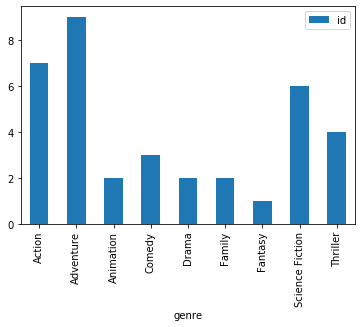

In [38]:
genres_movies = movies_genres.merge(pop_movies, how='right', 
                                      left_on = 'movie_id', 
                                      right_on = 'id')

genre_count = genres_movies.groupby('genre').agg({'id':'count'})
print(genre_count)

import matplotlib.pyplot as plt
genre_count.plot(kind='bar')
plt.show()

#### Tip

One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table. 

### Self joins

1. Hierarchical relationships

2. Sequencial relationships

3. Graph data

Merging a table to itself can be useful when you want to compare values in a column to other values in the same column. 

#### Example

Create a table that for each movie will list the movie director and a member of the crew on one row.

In [39]:
crews = pd.read_pickle('data/crews.p')
crews.head()

,id,department,job,name
0,19995,Editing,Editor,Stephen E. Rivkin
2,19995,Sound,Sound Designer,Christopher Boyes
4,19995,Production,Casting,Mali Finn
6,19995,Directing,Director,James Cameron
7,19995,Writing,Writer,James Cameron


In [40]:
crews_self_merged = crews.merge(crews, on='id', how='inner',
                                suffixes=('_dir','_crew'))
crews_self_merged.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
0,19995,Editing,Editor,Stephen E. Rivkin,Editing,Editor,Stephen E. Rivkin
1,19995,Editing,Editor,Stephen E. Rivkin,Sound,Sound Designer,Christopher Boyes
2,19995,Editing,Editor,Stephen E. Rivkin,Production,Casting,Mali Finn
3,19995,Editing,Editor,Stephen E. Rivkin,Directing,Director,James Cameron
4,19995,Editing,Editor,Stephen E. Rivkin,Writing,Writer,James Cameron


In [41]:
mask = ((crews_self_merged['job_dir'] == 'Director') & 
     (crews_self_merged['job_crew'] != 'Director'))

direct_crews = crews_self_merged[mask]
direct_crews

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays
...,...,...,...,...,...,...,...
834166,72766,Directing,Director,Edward Burns,Editing,Editor,Janet Gaynor
834174,231617,Directing,Director,Scott Smith,Production,Executive Producer,Scott Smith
834182,25975,Directing,Director,Brian Herzlinger,Production,Executive Producer,Clark Peterson
834186,25975,Directing,Director,Jon Gunn,Production,Executive Producer,Clark Peterson


#### Example

In [42]:
ratings = pd.read_pickle('data/ratings.p')
ratings_idx = ratings.set_index('id')
movies_idx = movies.set_index('id')

In [43]:
movies_ratings = movies_idx.merge(ratings_idx, on = 'id')
movies_ratings

,title,popularity,release_date,vote_average,vote_count
id,,,,,
257,Oliver Twist,20.415572,2005-09-23,6.7,274.0
14290,Better Luck Tomorrow,3.877036,2002-01-12,6.5,27.0
38365,Grown Ups,38.864027,2010-06-24,6.0,1705.0
9672,Infamous,3.680896,2006-11-16,6.4,60.0
12819,Alpha and Omega,12.300789,2010-09-17,5.3,124.0
...,...,...,...,...,...
3089,Red River,5.344815,1948-08-26,7.3,82.0
11934,The Hudsucker Proxy,14.188982,1994-03-11,7.1,275.0
13807,Exiled,8.486390,2006-09-06,7.0,46.0


#### Example

You'll find out which movie sequels earned the most compared to the original movie. 

In [44]:
sequels = pd.read_pickle('data/sequels.p')
sequels_idx = sequels.set_index('id')
sequels_idx.head()

,title,sequel
id,,
19995,Avatar,<NA>
862,Toy Story,863
863,Toy Story 2,10193
597,Titanic,<NA>
24428,The Avengers,<NA>


In [45]:
financials_idx = financials.set_index('id')
financials_idx.head()

,budget,revenue
id,,
19995,237000000,2.787965e+09
285,300000000,9.610000e+08
206647,245000000,8.806746e+08
49026,250000000,1.084939e+09
49529,260000000,2.841391e+08


In [46]:
import numpy as np

In [47]:
sequels_fin = sequels_idx.merge(financials_idx, on='id', how='left')
sequels_fin['sequel'] = sequels_fin['sequel'].fillna(-1) 
sequels_fin['sequel'] = sequels_fin['sequel'].replace(-1, np.nan)
sequels_fin['sequel'] = sequels_fin['sequel'].astype(float)

In [48]:
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                             right_on='id', right_index=True,
                             suffixes=('_org','_seq'))
orig_seq

,sequel,title_org,sequel_org,budget_org,revenue_org,title_seq,sequel_seq,budget_seq,revenue_seq
id,,,,,,,,,
862,863.0,Toy Story,863.0,30000000.0,373554033.0,Toy Story 2,10193.0,90000000.0,4.973669e+08
863,10193.0,Toy Story 2,10193.0,90000000.0,497366869.0,Toy Story 3,NaN,200000000.0,1.066970e+09
675,767.0,Harry Potter and the Order of the Phoenix,767.0,150000000.0,938212738.0,Harry Potter and the Half-Blood Prince,NaN,250000000.0,9.339592e+08
121,122.0,The Lord of the Rings: The Two Towers,122.0,79000000.0,926287400.0,The Lord of the Rings: The Return of the King,NaN,94000000.0,1.118889e+09
120,121.0,The Lord of the Rings: The Fellowship of the Ring,121.0,93000000.0,871368364.0,The Lord of the Rings: The Two Towers,122.0,79000000.0,9.262874e+08
...,...,...,...,...,...,...,...,...,...
76,80.0,Before Sunrise,80.0,2500000.0,5535405.0,Before Sunset,132344.0,2700000.0,1.599262e+07
2292,2295.0,Clerks,2295.0,27000.0,3151130.0,Clerks II,NaN,5000000.0,2.688838e+07
9367,8068.0,El Mariachi,8068.0,220000.0,2040920.0,Desperado,1428.0,7000000.0,2.540544e+07


In [49]:
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']
titles_diff = orig_seq[['title_org','title_seq','diff']]
titles_diff.sort_values(by = 'diff', ascending = False).head()

,title_org,title_seq,diff
id,,,
331,Jurassic Park III,Jurassic World,1.144748e+09
272,Batman Begins,The Dark Knight,6.303398e+08
10138,Iron Man 2,Iron Man 3,5.915067e+08
863,Toy Story 2,Toy Story 3,5.696028e+08
10764,Quantum of Solace,Skyfall,5.224703e+08


### Semi joins and anti joins

Semi_join: returns the intersection, but only returns columns from the left table and **not** the right and no duplicates

Anti_join: returns the left table, **excluding** the intersection, only columns from the left table and **not** the right.

#### Example

Filter the employee table by a table of top customers, returning only those employees who are not assigned to a customer.

The company's leadership will assign these employees additional training so that they can work with high valued customers.

In [50]:
d = {
    'cid':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
'srid':[3, 5, 3, 4, 4, 5, 5, 4, 4, 4, 5, 3, 4, 5, 3, 4, 5, 3, 3, 4, 5, 4, 4, 3, 5, 4, 4, 5, 3, 3, 5, 4, 3, 4, 4, 5, 3, 3, 4, 4, 5, 3, 3, 3, 3, 3, 5, 5, 4, 5, 5, 3, 3, 5, 4, 4, 5, 3, 3],
'fname':['Luís', 'Leonie', 'François', 'Bjørn', 'František', 'Helena', 'Astrid', 'Daan', 'Kara', 'Eduardo', 'Alexandre', 'Roberto', 'Fernanda', 'Mark', 'Jennifer', 'Frank', 'Jack', 'Michelle', 'Tim', 'Dan', 'Kathy', 'Heather', 'John', 'Frank', 'Victor', 'Richard', 'Patrick', 'Julia', 'Robert', 'Edward', 'Martha', 'Aaron', 'Ellie', 'João', 'Madalena', 'Hannah', 'Fynn', 'Niklas', 'Camille', 'Dominique', 'Marc', 'Wyatt', 'Isabelle', 'Terhi', 'Ladislav', 'Hugh', 'Lucas', 'Johannes', 'Stanisław', 'Enrique', 'Joakim', 'Emma', 'Phil', 'Steve', 'Mark', 'Diego', 'Luis', 'Manoj', 'Puja'],
'lname':['Gonçalves', 'Köhler', 'Tremblay', 'Hansen', 'Wichterlová', 'Holý', 'Gruber', 'Peeters', 'Nielsen', 'Martins', 'Rocha', 'Almeida', 'Ramos', 'Philips', 'Peterson', 'Harris', 'Smith', 'Brooks', 'Goyer', 'Miller', 'Chase', 'Leacock', 'Gordon', 'Ralston', 'Stevens', 'Cunningham', 'Gray', 'Barnett', 'Brown', 'Francis', 'Silk', 'Mitchell', 'Sullivan', 'Fernandes', 'Sampaio', 'Schneider', 'Zimmermann', 'Schröder', 'Bernard', 'Lefebvre', 'Dubois', 'Girard', 'Mercier', 'Hämäläinen', 'Kovács', "O'Reilly", 'Mancini', 'Van der Berg', 'Wójcik', 'Muñoz', 'Johansson', 'Jones', 'Hughes', 'Murray', 'Taylor', 'Gutiérrez', 'Rojas', 'Pareek', 'Srivastava'],
'phone':['+55 (12) 3923-5555', '+49 0711 2842222', '+1 (514) 721-4711', '+47 22 44 22 22', '+420 2 4172 5555', '+420 2 4177 0449', '+43 01 5134505', '+32 02 219 03 03', '+453 3331 9991', '+55 (11) 3033-5446', '+55 (11) 3055-3278', '+55 (21) 2271-7000', '+55 (61) 3363-5547', '+1 (780) 434-4554', '+1 (604) 688-2255', '+1 (650) 253-0000', '+1 (425) 882-8080', '+1 (212) 221-3546', '+1 (408) 996-1010', '+1 (650) 644-3358', '+1 (775) 223-7665', '+1 (407) 999-7788', '+1 (617) 522-1333', '+1 (312) 332-3232', '+1 (608) 257-0597', '+1 (817) 924-7272', '+1 (520) 622-4200', '+1 (801) 531-7272', '+1 (416) 363-8888', '+1 (613) 234-3322', '+1 (902) 450-0450', '+1 (204) 452-6452', '+1 (867) 920-2233', '+351 (213) 466-111', '+351 (225) 022-448', '+49 030 26550280', '+49 069 40598889', '+49 030 2141444', '+33 01 49 70 65 65', '+33 01 47 42 71 71', '+33 04 78 30 30 30', '+33 05 56 96 96 96', '+33 03 80 73 66 99', '+358 09 870 2000', np.nan, '+353 01 6792424', '+39 06 39733434', '+31 020 6223130', '+48 22 828 37 39', '+34 914 454 454', '+46 08-651 52 52', '+44 020 7707 0707', '+44 020 7976 5722', '+44 0131 315 3300', '+61 (02) 9332 3633', '+54 (0)11 4311 4333', '+56 (0)2 635 4444', '+91 0124 39883988', '+91 080 22289999'],
'fax':['+55 (12) 3923-5566', np.nan, np.nan, np.nan, '+420 2 4172 5555', np.nan, np.nan, np.nan, np.nan, '+55 (11) 3033-4564', '+55 (11) 3055-8131', '+55 (21) 2271-7070', '+55 (61) 3363-7855', '+1 (780) 434-5565', '+1 (604) 688-8756', '+1 (650) 253-0000', '+1 (425) 882-8081', '+1 (212) 221-4679', '+1 (408) 996-1011']+ [np.nan]*40,
'email':['luisg@embraer.com.br', 'leonekohler@surfeu.de', 'ftremblay@gmail.com', 'bjorn.hansen@yahoo.no', 'frantisekw@jetbrains.com', 'hholy@gmail.com', 'astrid.gruber@apple.at', 'daan_peeters@apple.be', 'kara.nielsen@jubii.dk', 'eduardo@woodstock.com.br', 'alero@uol.com.br', 'roberto.almeida@riotur.gov.br', 'fernadaramos4@uol.com.br', 'mphilips12@shaw.ca', 'jenniferp@rogers.ca', 'fharris@google.com', 'jacksmith@microsoft.com', 'michelleb@aol.com', 'tgoyer@apple.com', 'dmiller@comcast.com', 'kachase@hotmail.com', 'hleacock@gmail.com', 'johngordon22@yahoo.com', 'fralston@gmail.com', 'vstevens@yahoo.com', 'ricunningham@hotmail.com', 'patrick.gray@aol.com', 'jubarnett@gmail.com', 'robbrown@shaw.ca', 'edfrancis@yachoo.ca', 'marthasilk@gmail.com', 'aaronmitchell@yahoo.ca', 'ellie.sullivan@shaw.ca', 'jfernandes@yahoo.pt', 'masampaio@sapo.pt', 'hannah.schneider@yahoo.de', 'fzimmermann@yahoo.de', 'nschroder@surfeu.de', 'camille.bernard@yahoo.fr', 'dominiquelefebvre@gmail.com', 'marc.dubois@hotmail.com', 'wyatt.girard@yahoo.fr', 'isabelle_mercier@apple.fr', 'terhi.hamalainen@apple.fi', 'ladislav_kovacs@apple.hu', 'hughoreilly@apple.ie', 'lucas.mancini@yahoo.it', 'johavanderberg@yahoo.nl', 'stanisław.wójcik@wp.pl', 'enrique_munoz@yahoo.es', 'joakim.johansson@yahoo.se', 'emma_jones@hotmail.com', 'phil.hughes@gmail.com', 'steve.murray@yahoo.uk', 'mark.taylor@yahoo.au', 'diego.gutierrez@yahoo.ar', 'luisrojas@yahoo.cl', 'manoj.pareek@rediff.com', 'puja_srivastava@yahoo.in']
}

top_cust = pd.DataFrame(d)
top_cust.head()

,cid,srid,fname,lname,phone,fax,email
0,1,3,Luís,Gonçalves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br
1,2,5,Leonie,Köhler,+49 0711 2842222,NaN,leonekohler@surfeu.de
2,3,3,François,Tremblay,+1 (514) 721-4711,NaN,ftremblay@gmail.com
3,4,4,Bjørn,Hansen,+47 22 44 22 22,NaN,bjorn.hansen@yahoo.no
4,5,4,František,Wichterlová,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com


In [51]:
d = {
'srid':[1, 2, 3, 4, 5, 6, 7, 8],
'lname':['Adams', 'Edwards', 'Peacock', 'Park', 'Johnson', 'Mitchell', 'King', 'Callahan'],
'fname':['Andrew', 'Nancy', 'Jane', 'Margaret', 'Steve', 'Michael', 'Robert', 'Laura'],
'title':['General Manager', 'Sales Manager', 'Sales Support Agent', 'Sales Support Agent', 'Sales Support Agent', 'IT Manager', 'IT Staff', 'IT Staff'],
'hire_date':[pd.Timestamp('2002-08-14 00:00:00'), pd.Timestamp('2002-05-01 00:00:00'), pd.Timestamp('2002-04-01 00:00:00'), pd.Timestamp('2003-05-03 00:00:00'), pd.Timestamp('2003-10-17 00:00:00'), pd.Timestamp('2003-10-17 00:00:00'), pd.Timestamp('2004-01-02 00:00:00'), pd.Timestamp('2004-03-04 00:00:00')],
'email':['andrew@chinookcorp.com', 'nancy@chinookcorp.com', 'jane@chinookcorp.com', 'margaret@chinookcorp.com', 'steve@chinookcorp.com', 'michael@chinookcorp.com', 'robert@chinookcorp.com', 'laura@chinookcorp.com']
}
employees = pd.DataFrame(d)
employees

,srid,lname,fname,title,hire_date,email
0,1,Adams,Andrew,General Manager,2002-08-14,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,2002-05-01,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2003-05-03,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2003-10-17,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,2003-10-17,michael@chinookcorp.com
6,7,King,Robert,IT Staff,2004-01-02,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,2004-03-04,laura@chinookcorp.com


In [52]:
empl_cust = employees.merge(top_cust, on='srid', 
                            how='left', indicator=True)
empl_cust.head()

,srid,lname_x,fname_x,title,hire_date,email_x,cid,fname_y,lname_y,phone,fax,email_y,_merge
0,1,Adams,Andrew,General Manager,2002-08-14,andrew@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2,Edwards,Nancy,Sales Manager,2002-05-01,nancy@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com,1.0,Luís,Gonçalves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,both
3,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com,3.0,François,Tremblay,+1 (514) 721-4711,NaN,ftremblay@gmail.com,both
4,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com,12.0,Roberto,Almeida,+55 (21) 2271-7000,+55 (21) 2271-7070,roberto.almeida@riotur.gov.br,both


In [53]:
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']
srid_list

0     1
1     2
61    6
62    7
63    8
Name: srid, dtype: int64

In [54]:
employees[employees['srid'].isin(srid_list)]

,srid,lname,fname,title,hire_date,email
0,1,Adams,Andrew,General Manager,2002-08-14,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,2002-05-01,nancy@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,2003-10-17,michael@chinookcorp.com
6,7,King,Robert,IT Staff,2004-01-02,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,2004-03-04,laura@chinookcorp.com


We can see that there are five employees not supporting top customers. Anti-joins are a powerful tool to filter a main table (i.e. employees) by another (i.e. customers).

#### Example

You have been given a table of invoices that include top revenue-generating items. Additionally, you have a table of non-musical tracks from the streaming service. In this exercise, you'll use a semi-join to find the top revenue-generating non-musical tracks.

In [55]:
d = {
'tid':[2820, 2821, 2822, 2823, 2824, 2837, 2838, 2839, 2840, 2841, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2880, 2881, 2882, 2883, 2884, 2885, 2886, 2887, 2888, 2889, 2890, 2891, 2892, 2893, 2894, 2895, 2896, 2897, 2898, 2899, 2900, 2901, 2902, 2903, 2904, 2905, 2906, 2907, 2908, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925, 3165, 3166, 3167, 3168, 3169, 3170, 3171, 3172, 3173, 3174, 3175, 3176, 3177, 3178, 3179, 3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190, 3191, 3192, 3193, 3194, 3195, 3196, 3197, 3198, 3199, 3200, 3201, 3202, 3203, 3204, 3205, 3206, 3207, 3208, 3209, 3210, 3211, 3212, 3213, 3214, 3215, 3216, 3217, 3218, 3219, 3220, 3221, 3222, 3223, 3224, 3226, 3227, 3228, 3229, 3230, 3231, 3232, 3233, 3234, 3235, 3236, 3237, 3238, 3239, 3240, 3241, 3242, 3243, 3244, 3245, 3246, 3247, 3248, 3249, 3250, 3251, 3252, 3337, 3338, 3339, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348, 3360, 3361, 3362, 3363, 3364, 3428, 3429],
'name':['Occupation / Precipice', 'Exodus, Pt. 1', 'Exodus, Pt. 2', 'Collaborators', 'Torn', 'Crossroads, Pt. 1', 'Crossroads, Pt. 2', 'Genesis', "Don't Look Back", 'One Giant Leap', 'Collision', 'Hiros', 'Better Halves', 'Nothing to Hide', 'Seven Minutes to Midnight', 'Homecoming', 'Six Months Ago', 'Fallout', 'The Fix', 'Distractions', 'Run!', 'Unexpected', 'Company Man', 'Company Man', 'Parasite', 'A Tale of Two Cities', 'Lost (Pilot, Part 1) [Premiere]', 'Man of Science, Man of Faith (Premiere)', 'Adrift', 'Lost (Pilot, Part 2)', 'The Glass Ballerina', 'Further Instructions', 'Orientation', 'Tabula Rasa', 'Every Man for Himself', 'Everybody Hates Hugo', 'Walkabout', '...And Found', 'The Cost of Living', 'White Rabbit', 'Abandoned', 'House of the Rising Sun', 'I Do', 'Not In Portland', 'Not In Portland', 'The Moth', 'The Other 48 Days', 'Collision', 'Confidence Man', 'Flashes Before Your Eyes', 'Lost Survival Guide', 'Solitary', 'What Kate Did', 'Raised By Another', 'Stranger In a Strange Land', 'The 23rd Psalm', 'All the Best Cowboys Have Daddy Issues', 'The Hunting Party', 'Tricia Tanaka Is Dead', 'Enter 77', 'Fire + Water', 'Whatever the Case May Be', 'Hearts and Minds', 'Par Avion', 'The Long Con', 'One of Them', 'Special', 'The Man from Tallahassee', 'Exposé', 'Homecoming', 'Maternity Leave', 'Left Behind', 'Outlaws', 'The Whole Truth', '...In Translation', 'Lockdown', 'One of Us', 'Catch-22', 'Dave', 'Numbers', 'D.O.C.', 'Deus Ex Machina', 'S.O.S.', 'Do No Harm', 'Two for the Road', 'The Greater Good', '"?"', 'Born to Run', 'Three Minutes', 'Exodus (Part 1)', 'Live Together, Die Alone, Pt. 1', 'Exodus (Part 2) [Season Finale]', 'Live Together, Die Alone, Pt. 2', 'Exodus (Part 3) [Season Finale]', 'The Brig', '.07%', 'Five Years Gone', 'The Hard Part', 'The Man Behind the Curtain', 'Greatest Hits', 'Landslide', 'The Office: An American Workplace (Pilot)', 'Diversity Day', 'Health Care', 'The Alliance', 'Basketball', 'Hot Girl', 'The Dundies', 'Sexual Harassment', 'Office Olympics', 'The Fire', 'Halloween', 'The Fight', 'The Client', 'Performance Review', 'Email Surveillance', 'Christmas Party', 'Booze Cruise', 'The Injury', 'The Secret', 'The Carpet', 'Boys and Girls', "Valentine's Day", "Dwight's Speech", 'Take Your Daughter to Work Day', "Michael's Birthday", 'Drug Testing', 'Conflict Resolution', 'Casino Night - Season Finale', 'Gay Witch Hunt', 'The Convention', 'The Coup', 'Grief Counseling', 'The Initiation', 'Diwali', 'Branch Closing', 'The Merger', 'The Convict', 'A Benihana Christmas, Pts. 1 & 2', 'Back from Vacation', 'Traveling Salesmen', "Producer's Cut: The Return", 'Ben Franklin', "Phyllis's Wedding", 'Business School', 'Cocktails', 'The Negotiation', 'Safety Training', 'Product Recall', "Women's Appreciation", 'Beach Games', 'The Job', 'How to Stop an Exploding Man', 'Through a Looking Glass', 'Battlestar Galactica, Pt. 1', 'Battlestar Galactica, Pt. 2', 'Battlestar Galactica, Pt. 3', 'Lost Planet of the Gods, Pt. 1', 'Lost Planet of the Gods, Pt. 2', 'The Lost Warrior', 'The Long Patrol', 'The Gun On Ice Planet Zero, Pt. 1', 'The Gun On Ice Planet Zero, Pt. 2', 'The Magnificent Warriors', 'The Young Lords', 'The Living Legend, Pt. 1', 'The Living Legend, Pt. 2', 'Fire In Space', 'War of the Gods, Pt. 1', 'War of the Gods, Pt. 2', 'The Man With Nine Lives', 'Murder On the Rising Star', 'Greetings from Earth, Pt. 1', 'Greetings from Earth, Pt. 2', "Baltar's Escape", 'Experiment In Terra', 'Take the Celestra', 'The Hand of God', 'Pilot', 'Through the Looking Glass, Pt. 2', 'Through the Looking Glass, Pt. 1', 'Past, Present, and Future', 'The Beginning of the End', 'LOST Season 4 Trailer', 'LOST In 8:15', 'Confirmed Dead', 'The Economist', 'Eggtown', 'The Constant', 'The Other Woman', 'Ji Yeon', 'Meet Kevin Johnson', 'The Shape of Things to Come', 'Something Nice Back Home', 'Cabin Fever', "There's No Place Like Home, Pt. 1", "There's No Place Like Home, Pt. 2", "There's No Place Like Home, Pt. 3", 'Branch Closing', 'The Return'],
'aid':[227, 227, 227, 227, 227, 227, 227, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 229, 230, 231, 231, 230, 229, 229, 231, 230, 229, 231, 230, 231, 229, 230, 231, 230, 229, 229, 229, 230, 231, 231, 230, 229, 229, 230, 231, 230, 229, 231, 230, 231, 229, 229, 231, 230, 230, 229, 231, 231, 230, 229, 229, 230, 231, 229, 230, 231, 230, 231, 229, 229, 231, 230, 229, 230, 231, 230, 231, 230, 231, 230, 231, 230, 231, 230, 231, 230, 229, 228, 228, 228, 229, 229, 228, 249, 249, 249, 249, 249, 249, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 228, 229, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 229, 229, 261, 261, 261, 261, 261, 261, 261, 261, 261, 261, 261, 261, 261, 261, 261, 261, 261, 251, 251],
'mtid':[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
'gid':[19, 19, 19, 19, 19, 20, 20, 19, 21, 21, 21, 21, 21, 19, 21, 21, 19, 21, 21, 21, 21, 21, 21, 21, 21, 19, 19, 19, 19, 19, 21, 19, 19, 19, 21, 19, 19, 19, 19, 19, 19, 19, 19, 21, 21, 19, 19, 19, 19, 21, 21, 19, 19, 19, 21, 19, 19, 21, 21, 21, 21, 19, 19, 21, 19, 21, 19, 21, 21, 19, 21, 21, 19, 21, 19, 21, 21, 21, 19, 19, 21, 19, 19, 19, 21, 19, 19, 19, 19, 19, 21, 19, 19, 19, 21, 21, 21, 21, 21, 21, 21, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 21, 21, 21, 21, 21, 21, 21, 21, 19, 21, 21, 19, 19, 21, 21, 21, 21, 21, 21, 22, 22],
'u_price':[1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99]
}
non_mus_tcks = pd.DataFrame(d)
non_mus_tcks.head()

,tid,name,aid,mtid,gid,u_price
0,2820,Occupation / Precipice,227,3,19,1.99
1,2821,"Exodus, Pt. 1",227,3,19,1.99
2,2822,"Exodus, Pt. 2",227,3,19,1.99
3,2823,Collaborators,227,3,19,1.99
4,2824,Torn,227,3,19,1.99


In [56]:
d = {
'ilid':[470, 473, 476, 527, 528, 533, 1098, 1100, 1668, 1670, 1678, 1686, 2190, 2192, 2194, 2240],
'iid':[88, 88, 88, 96, 96, 99, 201, 202, 306, 307, 310, 312, 404, 404, 404, 412],
'tid':[2832, 2850, 2868, 3214, 3223, 3250, 3200, 3223, 3177, 3200, 3214, 3250, 2832, 2850, 2868, 3177],
'u_price':[1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99],
'quantity':[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}
top_invoices = pd.DataFrame(d)
top_invoices.head()

,ilid,iid,tid,u_price,quantity
0,470,88,2832,1.99,1
1,473,88,2850,1.99,1
2,476,88,2868,1.99,1
3,527,96,3214,1.99,1
4,528,96,3223,1.99,1


In [57]:
d = {
'gid':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
'name':['Rock', 'Jazz', 'Metal', 'Alternative & Punk', 'Rock And Roll', 'Blues', 'Latin', 'Reggae', 'Pop', 'Soundtrack', 'Bossa Nova', 'Easy Listening', 'Heavy Metal', 'R&B/Soul', 'Electronica/Dance', 'World', 'Hip Hop/Rap', 'Science Fiction', 'TV Shows', 'Sci Fi & Fantasy', 'Drama', 'Comedy', 'Alternative', 'Classical', 'Opera']
}
genres = pd.DataFrame(d)
genres.head()

,gid,name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


Semi-join to filter the table of tracks by the table of invoice items to find the top revenue non-musical tracks

In [58]:
tracks_invoices = non_mus_tcks.merge(top_invoices, on = 'tid')
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]
print(top_tracks)
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid':'size'}) #or 'count'
print(cnt_by_gid.merge(genres, on = 'gid'))

      tid                          name  aid  mtid  gid  u_price
18   2850                       The Fix  228     3   21     1.99
36   2868                     Walkabout  230     3   19     1.99
106  3177                      Hot Girl  249     3   19     1.99
129  3200                Gay Witch Hunt  251     3   19     1.99
143  3214             Phyllis's Wedding  251     3   22     1.99
152  3223  How to Stop an Exploding Man  228     3   21     1.99
178  3250                         Pilot  254     3   19     1.99
   gid  tid      name
0   19    4  TV Shows
1   21    2     Drama
2   22    1    Comedy


#### Concat and append

In [59]:
d = {
'tid':[1853, 1854, 1857],
'name':['Battery', 'Master Of Puppets', 'Disposable Heroes'],
'aid':[152, 152, 152],
'mtid':[1, 1, 1],
'gid':[3, 3, 3],
'composer':['J.Hetfield/L.Ulrich', 'K.Hammett', 'J.Hetfield/L.Ulrich'],
'u_price':[0.99, 0.99, 0.99]
}
tracks_master = pd.DataFrame(d)

d = {
'tid':[1874, 1875, 1876, 1877, 1878],
'name':['Fight Fire With Fire', 'Ride The Lightning', 'For Whom The Bell Tolls', 'Fade To Black', 'Trapped Under Ice'],
'aid':[154, 154, 154, 154, 154],
'mtid':[1, 1, 1, 1, 1],
'gid':[3, 3, 3, 3, 3],
'u_price':[0.99, 0.99, 0.99, 0.99, 0.99]
}
tracks_ride = pd.DataFrame(d)

d = {
'tid':[1882, 1883, 1884, 1885, 1886],
'name':['Frantic', 'St. Anger', 'Some Kind Of Monster', 'Dirty Window', 'Invisible Kid'],
'aid':[155, 155, 155, 155, 155],
'mtid':[1, 1, 1, 1, 1],
'gid':[3, 3, 3, 3, 3],
'u_price':[0.99, 0.99, 0.99, 0.99, 0.99]
}
tracks_st = pd.DataFrame(d)

In [60]:
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               sort=True) #sort columns
tracks_from_albums

,aid,composer,gid,mtid,name,tid,u_price
0,152,J.Hetfield/L.Ulrich,3,1,Battery,1853,0.99
1,152,K.Hammett,3,1,Master Of Puppets,1854,0.99
2,152,J.Hetfield/L.Ulrich,3,1,Disposable Heroes,1857,0.99
0,154,NaN,3,1,Fight Fire With Fire,1874,0.99
1,154,NaN,3,1,Ride The Lightning,1875,0.99
2,154,NaN,3,1,For Whom The Bell Tolls,1876,0.99
3,154,NaN,3,1,Fade To Black,1877,0.99
4,154,NaN,3,1,Trapped Under Ice,1878,0.99
0,155,NaN,3,1,Frantic,1882,0.99
1,155,NaN,3,1,St. Anger,1883,0.99


In [61]:
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               ignore_index= True,
                               sort=True)
tracks_from_albums

,aid,composer,gid,mtid,name,tid,u_price
0,152,J.Hetfield/L.Ulrich,3,1,Battery,1853,0.99
1,152,K.Hammett,3,1,Master Of Puppets,1854,0.99
2,152,J.Hetfield/L.Ulrich,3,1,Disposable Heroes,1857,0.99
3,154,NaN,3,1,Fight Fire With Fire,1874,0.99
4,154,NaN,3,1,Ride The Lightning,1875,0.99
5,154,NaN,3,1,For Whom The Bell Tolls,1876,0.99
6,154,NaN,3,1,Fade To Black,1877,0.99
7,154,NaN,3,1,Trapped Under Ice,1878,0.99
8,155,NaN,3,1,Frantic,1882,0.99
9,155,NaN,3,1,St. Anger,1883,0.99


In [62]:
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               sort=True,
                               join = 'inner')
tracks_from_albums

,aid,gid,mtid,name,tid,u_price
0,152,3,1,Battery,1853,0.99
1,152,3,1,Master Of Puppets,1854,0.99
2,152,3,1,Disposable Heroes,1857,0.99
0,154,3,1,Fight Fire With Fire,1874,0.99
1,154,3,1,Ride The Lightning,1875,0.99
2,154,3,1,For Whom The Bell Tolls,1876,0.99
3,154,3,1,Fade To Black,1877,0.99
4,154,3,1,Trapped Under Ice,1878,0.99
0,155,3,1,Frantic,1882,0.99
1,155,3,1,St. Anger,1883,0.99


#### Example

In [63]:
d = {
'iid':[42, 43, 44, 45, 46, 47, 48, 126, 127, 128, 129, 130, 131, 132, 209, 210, 211, 212, 213, 214, 215, 292, 293, 294, 295, 296, 297, 298, 371, 372, 373, 374, 375, 376, 377],
'cid':[51, 53, 55, 59, 6, 15, 29, 35, 37, 39, 43, 49, 58, 13, 18, 19, 21, 23, 27, 33, 42, 47, 2, 3, 5, 7, 11, 17, 8, 10, 12, 16, 22, 31, 45],
'invoice_date':[pd.Timestamp('2009-07-06 00:00:00'), pd.Timestamp('2009-07-06 00:00:00'), pd.Timestamp('2009-07-07 00:00:00'), pd.Timestamp('2009-07-08 00:00:00'), pd.Timestamp('2009-07-11 00:00:00'), pd.Timestamp('2009-07-16 00:00:00'), pd.Timestamp('2009-07-24 00:00:00'), pd.Timestamp('2010-07-13 00:00:00'), pd.Timestamp('2010-07-13 00:00:00'), pd.Timestamp('2010-07-14 00:00:00'), pd.Timestamp('2010-07-15 00:00:00'), pd.Timestamp('2010-07-18 00:00:00'), pd.Timestamp('2010-07-23 00:00:00'), pd.Timestamp('2010-07-31 00:00:00'), pd.Timestamp('2011-07-07 00:00:00'), pd.Timestamp('2011-07-20 00:00:00'), pd.Timestamp('2011-07-20 00:00:00'), pd.Timestamp('2011-07-21 00:00:00'), pd.Timestamp('2011-07-22 00:00:00'), pd.Timestamp('2011-07-25 00:00:00'), pd.Timestamp('2011-07-30 00:00:00'),pd.Timestamp('2012-07-05 00:00:00'), pd.Timestamp('2012-07-13 00:00:00'), pd.Timestamp('2012-07-26 00:00:00'), pd.Timestamp('2012-07-26 00:00:00'), pd.Timestamp('2012-07-27 00:00:00'), pd.Timestamp('2012-07-28 00:00:00'), pd.Timestamp('2012-07-31 00:00:00'), pd.Timestamp('2013-07-02 00:00:00'), pd.Timestamp('2013-07-02 00:00:00'), pd.Timestamp('2013-07-03 00:00:00'), pd.Timestamp('2013-07-04 00:00:00'), pd.Timestamp('2013-07-07 00:00:00'), pd.Timestamp('2013-07-12 00:00:00'), pd.Timestamp('2013-07-20 00:00:00')],
'total':[1.98, 1.98, 3.96, 5.94, 8.91, 13.86, 0.99, 1.98, 1.98, 3.96, 5.94, 8.91, 13.86, 0.99, 0.99, 1.98, 1.98, 3.96, 5.94, 8.91, 13.86, 13.86, 0.99, 1.98, 1.98, 3.96, 5.94, 10.91, 1.98, 1.98, 3.96, 5.94, 8.91, 13.86, 0.99],
'bill_ctry':['Sweden', 'UK', 'Australia', 'India', 'Czech Republic', 'Canada', 'Canada', 'Portugal', 'Germany', 'France', 'France', 'Poland', 'India', 'Brazil', 'USA', 'USA', 'USA', 'USA', 'USA', 'Canada', 'France', 'Italy', 'Germany', 'Canada', 'Czech Republic', 'Austria', 'Brazil', 'USA', 'Belgium', 'Brazil', 'Brazil', 'USA', 'USA', 'Canada', 'Hungary']
}
inv_jul = pd.DataFrame(d)

d = {
'iid':[49, 50, 51, 52, 53, 54, 55, 133, 134, 135, 136, 137, 138, 139, 216, 217, 218, 219, 220, 221, 222, 299, 300, 301, 302, 303, 304, 305, 378, 379, 380, 381, 382, 383, 384],
'cid':[30, 32, 34, 38, 44, 53, 8, 14, 16, 18, 22, 28, 37, 51, 56, 57, 59, 2, 6, 12, 21, 26, 40, 41, 43, 45, 49, 55, 46, 48, 50, 54, 1, 10, 24],
'invoice_date':[pd.Timestamp('2009-08-06 00:00:00'), pd.Timestamp('2009-08-06 00:00:00'), pd.Timestamp('2009-08-07 00:00:00'), pd.Timestamp('2009-08-08 00:00:00'), pd.Timestamp('2009-08-11 00:00:00'), pd.Timestamp('2009-08-16 00:00:00'), pd.Timestamp('2009-08-24 00:00:00'), pd.Timestamp('2010-08-13 00:00:00'), pd.Timestamp('2010-08-13 00:00:00'), pd.Timestamp('2010-08-14 00:00:00'), pd.Timestamp('2010-08-15 00:00:00'), pd.Timestamp('2010-08-18 00:00:00'), pd.Timestamp('2010-08-23 00:00:00'), pd.Timestamp('2010-08-31 00:00:00'), pd.Timestamp('2011-08-07 00:00:00'), pd.Timestamp('2011-08-20 00:00:00'), pd.Timestamp('2011-08-20 00:00:00'), pd.Timestamp('2011-08-21 00:00:00'), pd.Timestamp('2011-08-22 00:00:00'), pd.Timestamp('2011-08-25 00:00:00'), pd.Timestamp('2011-08-30 00:00:00'), pd.Timestamp('2012-08-05 00:00:00'), pd.Timestamp('2012-08-13 00:00:00'), pd.Timestamp('2012-08-26 00:00:00'), pd.Timestamp('2012-08-26 00:00:00'), pd.Timestamp('2012-08-27 00:00:00'), pd.Timestamp('2012-08-28 00:00:00'), pd.Timestamp('2012-08-31 00:00:00'), pd.Timestamp('2013-08-02 00:00:00'), pd.Timestamp('2013-08-02 00:00:00'), pd.Timestamp('2013-08-03 00:00:00'), pd.Timestamp('2013-08-04 00:00:00'), pd.Timestamp('2013-08-07 00:00:00'), pd.Timestamp('2013-08-12 00:00:00'), pd.Timestamp('2013-08-20 00:00:00')],
'total':[1.98, 1.98, 3.96, 5.94, 8.91, 13.86, 0.99, 1.98, 1.98, 3.96, 5.94, 8.91, 13.86, 0.99, 0.99, 1.98, 1.98, 3.96, 5.94, 8.91, 13.86, 23.86, 0.99, 1.98, 1.98, 3.96, 5.94, 8.91, 1.98, 1.98, 3.96, 5.94, 8.91, 13.86, 0.99],
'bill_ctry':['Canada', 'Canada', 'Portugal', 'Germany', 'Finland', 'UK', 'Belgium', 'Canada', 'USA', 'USA', 'USA', 'USA', 'Germany', 'Sweden', 'Argentina', 'Chile', 'India', 'Germany', 'Czech Republic', 'Brazil', 'USA', 'USA', 'France', 'France', 'France', 'Hungary', 'Poland', 'Australia', 'Ireland', 'Netherlands', 'Spain', 'UK', 'Brazil', 'Brazil', 'USA']
}
inv_aug = pd.DataFrame(d)

d = {
'iid':[56, 57, 58, 59, 60, 61, 62, 140, 141, 142, 143, 144, 145, 223, 224, 225, 226, 227, 228, 229, 306, 307, 308, 309, 310, 311, 385, 386, 387, 388, 389, 390, 391],
'cid':[9, 11, 13, 17, 23, 32, 46, 52, 54, 56, 1, 7, 16, 35, 36, 38, 40, 44, 50, 59, 5, 19, 20, 22, 24, 28, 25, 27, 29, 33, 39, 48, 3],
'invoice_date':[pd.Timestamp('2009-09-06 00:00:00'), pd.Timestamp('2009-09-06 00:00:00'), pd.Timestamp('2009-09-07 00:00:00'), pd.Timestamp('2009-09-08 00:00:00'), pd.Timestamp('2009-09-11 00:00:00'), pd.Timestamp('2009-09-16 00:00:00'), pd.Timestamp('2009-09-24 00:00:00'), pd.Timestamp('2010-09-13 00:00:00'), pd.Timestamp('2010-09-13 00:00:00'), pd.Timestamp('2010-09-14 00:00:00'), pd.Timestamp('2010-09-15 00:00:00'), pd.Timestamp('2010-09-18 00:00:00'), pd.Timestamp('2010-09-23 00:00:00'), pd.Timestamp('2011-09-07 00:00:00'), pd.Timestamp('2011-09-20 00:00:00'), pd.Timestamp('2011-09-20 00:00:00'), pd.Timestamp('2011-09-21 00:00:00'), pd.Timestamp('2011-09-22 00:00:00'), pd.Timestamp('2011-09-25 00:00:00'), pd.Timestamp('2011-09-30 00:00:00'), pd.Timestamp('2012-09-05 00:00:00'), pd.Timestamp('2012-09-13 00:00:00'), pd.Timestamp('2012-09-26 00:00:00'), pd.Timestamp('2012-09-26 00:00:00'), pd.Timestamp('2012-09-27 00:00:00'), pd.Timestamp('2012-09-28 00:00:00'), pd.Timestamp('2013-09-02 00:00:00'), pd.Timestamp('2013-09-02 00:00:00'), pd.Timestamp('2013-09-03 00:00:00'), pd.Timestamp('2013-09-04 00:00:00'), pd.Timestamp('2013-09-07 00:00:00'), pd.Timestamp('2013-09-12 00:00:00'), pd.Timestamp('2013-09-20 00:00:00')],
'total':[1.98, 1.98, 3.96, 5.94, 8.91, 13.86, 0.99, 1.98, 1.98, 3.96, 5.94, 8.91, 13.86, 0.99, 1.98, 1.98, 3.96, 5.94, 8.91, 13.86, 16.86, 1.99, 3.98, 3.98, 7.96, 11.94, 1.98, 1.98, 3.96, 5.94, 8.91, 13.86, 0.99],
'bill_ctry':['Denmark', 'Brazil', 'Brazil', 'USA', 'USA', 'Canada', 'Ireland', 'UK', 'UK', 'Argentina', 'Brazil', 'Austria', 'USA', 'Portugal', 'Germany', 'Germany', 'France', 'Finland', 'Spain', 'India', 'Czech Republic', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'Canada', 'Canada', 'France', 'Netherlands', 'Canada']
}
inv_sep = pd.DataFrame(d)

         iid  cid invoice_date  total       bill_ctry
7Jul 0    42   51   2009-07-06   1.98          Sweden
     1    43   53   2009-07-06   1.98              UK
     2    44   55   2009-07-07   3.96       Australia
     3    45   59   2009-07-08   5.94           India
     4    46    6   2009-07-11   8.91  Czech Republic
...      ...  ...          ...    ...             ...
9Sep 28  387   29   2013-09-03   3.96          Canada
     29  388   33   2013-09-04   5.94          Canada
     30  389   39   2013-09-07   8.91          France
     31  390   48   2013-09-12  13.86     Netherlands
     32  391    3   2013-09-20   0.99          Canada

[103 rows x 5 columns]
         total
7Jul  5.431429
8Aug  5.660000
9Sep  5.945455


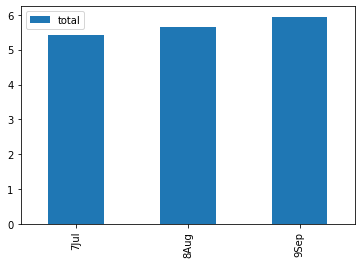

In [64]:
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep],
                            keys=['7Jul', '8Aug', '9Sep'])
print(inv_jul_thr_sep)
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({'total':'mean'})
print(avg_inv_by_month)

avg_inv_by_month.plot(kind='bar')
plt.show()

#### Example

In [65]:
d = {
'ilid':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 
        1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231, 2232, 2233, 2234, 2235, 2236, 2237, 2238, 2239, 2240],
'iid':[1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 7, 7, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 14, 14, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 21, 21, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 28, 28, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 35, 35, 36, 36, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 41, 42, 42, 43, 43, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 48, 49, 49, 50, 50, 51, 51, 51, 51, 52, 52, 52, 52, 52, 52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 55, 56, 56, 57, 57, 58, 58, 58, 58, 59, 59, 59, 59, 59, 59, 60, 60, 60, 60, 60, 60, 60, 60, 60, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 62, 63, 63, 64, 64, 65, 65, 65, 65, 66, 66, 66, 66, 66, 66, 67, 67, 67, 67, 67, 67, 67, 67, 67, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 69, 70, 70, 71, 71, 72, 72, 72, 72, 73, 73, 73, 73, 73, 73, 74, 74, 74, 74, 74, 74, 74, 74, 74, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 76, 77, 77, 78, 78, 79, 79, 79, 79, 80, 80, 80, 80, 80, 80, 81, 81, 81, 81, 81, 81, 81, 81, 81, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 83, 84, 84, 85, 85, 86, 86, 86, 86, 87, 87, 87, 87, 87, 87, 88, 88, 88, 88, 88, 88, 88, 88, 88, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 90, 91, 91, 92, 92, 93, 93, 93, 93, 94, 94, 94, 94, 94, 94, 95, 95, 95, 95, 95, 95, 95, 95, 95, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 97, 98, 98, 99, 99, 100, 100, 100, 100, 101, 101, 101, 101, 101, 101, 102, 102, 102, 102, 102, 102, 102, 102, 102, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 104, 105, 105, 106, 106, 107, 107, 107, 107, 108, 108, 108, 108, 108, 108, 109, 109, 109, 109, 109, 109, 109, 109, 109, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 111, 112, 112, 113, 113, 114, 114, 114, 114, 115, 115, 115, 115, 115, 115, 116, 116, 116, 116, 116, 116, 116, 116, 116, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 118, 119, 119, 120, 120, 121, 121, 121, 121, 122, 122, 122, 122, 122, 122, 123, 123, 123, 123, 123, 123, 123, 123, 123, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 125, 126, 126, 127, 127, 128, 128, 128, 128, 129, 129, 129, 129, 129, 129, 130, 130, 130, 130, 130, 130, 130, 130, 130, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 132, 133, 133, 134, 134, 135, 135, 135, 135, 136, 136, 136, 136, 136, 136, 137, 137, 137, 137, 137, 137, 137, 137, 137, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 139, 140, 140, 141, 141, 142, 142, 142, 142, 143, 143, 143, 143, 143, 143, 144, 144, 144, 144, 144, 144, 144, 144, 144, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 146, 147, 147, 148, 148, 149, 149, 149, 149, 150, 150, 150, 150, 150, 150, 151, 151, 151, 151, 151, 151, 151, 151, 151, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 153, 154, 154, 155, 155, 156, 156, 156, 156, 157, 157, 157, 157, 157, 157, 158, 158, 158, 158, 158, 158, 158, 158, 158, 159, 159, 159, 159, 159, 159, 159, 159, 159, 159, 159, 159, 159, 159, 160, 161, 161, 162, 162, 163, 163, 163, 163, 164, 164, 164, 164, 164, 164, 165, 165, 165, 165, 165, 165, 165, 165, 165, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 167, 168, 168, 169, 169, 170, 170, 170, 170, 171, 171, 171, 171, 171, 171, 172, 172, 172, 172, 172, 172, 172, 172, 172, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 174, 175, 175, 176, 176, 177, 177, 177, 177, 178, 178, 178, 178, 178, 178, 179, 179, 179, 179, 179, 179, 179, 179, 179, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 181, 182, 182, 183, 183, 184, 184, 184, 184, 185, 185, 185, 185, 185, 185, 186, 186, 186, 186, 186, 186, 186, 186, 186, 187, 187, 187, 187, 187, 187, 187, 187, 187, 187, 187, 187, 187, 187, 188, 189, 189, 190, 190, 191, 191, 191, 191, 192, 192, 192, 192, 192, 192, 193, 193, 193, 193, 193, 193, 193, 193, 193, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 195, 196, 196, 197, 197, 198, 198, 198, 198, 199, 199, 199, 199, 199, 199, 200, 200, 200, 200, 200, 200, 200, 200, 200, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 202, 203, 203, 204, 204, 205, 205, 205, 205, 206, 206, 206, 206, 206, 206, 207, 207, 207, 207, 207, 207, 207, 207, 207, 208, 208, 208, 208, 208, 208, 208, 208, 208, 208, 208, 208, 208, 208, 209, 210, 210, 211, 211, 212, 212, 212, 212, 213, 213, 213, 213, 213, 213, 214, 214, 214, 214, 214, 214, 214, 214, 214, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 216, 217, 217, 218, 218, 219, 219, 219, 219, 220, 220, 220, 220, 220, 220, 221, 221, 221, 221, 221, 221, 221, 221, 221, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 223, 224, 224, 225, 225, 226, 226, 226, 226, 227, 227, 227, 227, 227, 227, 228, 228, 228, 228, 228, 228, 228, 228, 228, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 230, 231, 231, 232, 232, 233, 233, 233, 233, 234, 234, 234, 234, 234, 234, 235, 235, 235, 235, 235, 235, 235, 235, 235, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 236, 237, 238, 238, 239, 239, 240, 240, 240, 240, 241, 241, 241, 241, 241, 241, 242, 242, 242, 242, 242, 242, 242, 242, 242, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 243, 244, 245, 245, 246, 246, 247, 247, 247, 247, 248, 248, 248, 248, 248, 248, 249, 249, 249, 249, 249, 249, 249, 249, 249, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 251, 252, 252, 253, 253, 254, 254, 254, 254, 255, 255, 255, 255, 255, 255, 256, 256, 256, 256, 256, 256, 256, 256, 256, 257, 257, 257, 257, 257, 257, 257, 257, 257, 257, 257, 257, 257, 257, 258, 259, 259, 260, 260, 261, 261, 261, 261, 262, 262, 262, 262, 262, 262, 263, 263, 263, 263, 263, 263, 263, 263, 263, 264, 264, 264, 264, 264, 264, 264, 264, 264, 264, 264, 264, 264, 264, 265, 266, 266, 267, 267, 268, 268, 268, 268, 269, 269, 269, 269, 269, 269, 270, 270, 270, 270, 270, 270, 270, 270, 270, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 272, 273, 273, 274, 274, 275, 275, 275, 275, 276, 276, 276, 276, 276, 276, 277, 277, 277, 277, 277, 277, 277, 277, 277, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 279, 280, 280, 281, 281, 282, 282, 282, 282, 283, 283, 283, 283, 283, 283, 284, 284, 284, 284, 284, 284, 284, 284, 284, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 286, 287, 287, 288, 288, 289, 289, 289, 289, 290, 290, 290, 290, 290, 290, 291, 291, 291, 291, 291, 291, 291, 291, 291, 292, 292, 292, 292, 292, 292, 292, 292, 292, 292, 292, 292, 292, 292, 293, 294, 294, 295, 295, 296, 296, 296, 296, 297, 297, 297, 297, 297, 297, 298, 298, 298, 298, 298, 298, 298, 298, 298, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 300, 301, 301, 302, 302, 303, 303, 303, 303, 304, 304, 304, 304, 304, 304, 305, 305, 305, 305, 305, 305, 305, 305, 305, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 307, 308, 308, 309, 309, 310, 310, 310, 310, 311, 311, 311, 311, 311, 311, 312, 312, 312, 312, 312, 312, 312, 312, 312, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 314, 315, 315, 316, 316, 317, 317, 317, 317, 318, 318, 318, 318, 318, 318, 319, 319, 319, 319, 319, 319, 319, 319, 319, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 321, 322, 322, 323, 323, 324, 324, 324, 324, 325, 325, 325, 325, 325, 325, 326, 326, 326, 326, 326, 326, 326, 326, 326, 327, 327, 327, 327, 327, 327, 327, 327, 327, 327, 327, 327, 327, 327, 328, 329, 329, 330, 330, 331, 331, 331, 331, 332, 332, 332, 332, 332, 332, 333, 333, 333, 333, 333, 333, 333, 333, 333, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 335, 336, 336, 337, 337, 338, 338, 338, 338, 339, 339, 339, 339, 339, 339, 340, 340, 340, 340, 340, 340, 340, 340, 340, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 342, 343, 343, 344, 344, 345, 345, 345, 345, 346, 346, 346, 346, 346, 346, 347, 347, 347, 347, 347, 347, 347, 347, 347, 348, 348, 348, 348, 348, 348, 348, 348, 348, 348, 348, 348, 348, 348, 349, 350, 350, 351, 351, 352, 352, 352, 352, 353, 353, 353, 353, 353, 353, 354, 354, 354, 354, 354, 354, 354, 354, 354, 355, 355, 355, 355, 355, 355, 355, 355, 355, 355, 355, 355, 355, 355, 356, 357, 357, 358, 358, 359, 359, 359, 359, 360, 360, 360, 360, 360, 360, 361, 361, 361, 361, 361, 361, 361, 361, 361, 362, 362, 362, 362, 362, 362, 362, 362, 362, 362, 362, 362, 362, 362, 363, 364, 364, 365, 365, 366, 366, 366, 366, 367, 367, 367, 367, 367, 367, 368, 368, 368, 368, 368, 368, 368, 368, 368, 369, 369, 369, 369, 369, 369, 369, 369, 369, 369, 369, 369, 369, 369, 370, 371, 371, 372, 372, 373, 373, 373, 373, 374, 374, 374, 374, 374, 374, 375, 375, 375, 375, 375, 375, 375, 375, 375, 376, 376, 376, 376, 376, 376, 376, 376, 376, 376, 376, 376, 376, 376, 377, 378, 378, 379, 379, 380, 380, 380, 380, 381, 381, 381, 381, 381, 381, 382, 382, 382, 382, 382, 382, 382, 382, 382, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 384, 385, 385, 386, 386, 387, 387, 387, 387, 388, 388, 388, 388, 388, 388, 389, 389, 389, 389, 389, 389, 389, 389, 389, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 391, 392, 392, 393, 393, 394, 394, 394, 394, 395, 395, 395, 395, 395, 395, 396, 396, 396, 396, 396, 396, 396, 396, 396, 397, 397, 397, 397, 397, 397, 397, 397, 397, 397, 397, 397, 397, 397, 398, 399, 399, 400, 400, 401, 401, 401, 401, 402, 402, 402, 402, 402, 402, 403, 403, 403, 403, 403, 403, 403, 403, 403, 404, 404, 404, 404, 404, 404, 404, 404, 404, 404, 404, 404, 404, 404, 405, 406, 406, 407, 407, 408, 408, 408, 408, 409, 409, 409, 409, 409, 409, 410, 410, 410, 410, 410, 410, 410, 410, 410, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 412],
'tid':[2, 4, 6, 8, 10, 12, 16, 20, 24, 28, 32, 36, 42, 48, 54, 60, 66, 72, 78, 84, 90, 99, 108, 117, 126, 135, 144, 153, 162, 171, 180, 189, 198, 207, 216, 230, 231, 232, 234, 236, 238, 240, 242, 244, 248, 252, 256, 260, 264, 268, 274, 280, 286, 292, 298, 304, 310, 316, 322, 331, 340, 349, 358, 367, 376, 385, 394, 403, 412, 421, 430, 439, 448, 462, 463, 464, 466, 468, 470, 472, 474, 476, 480, 484, 488, 492, 496, 500, 506, 512, 518, 524, 530, 536, 542, 548, 554, 563, 572, 581, 590, 599, 608, 617, 626, 635, 644, 653, 662, 671, 680, 694, 695, 696, 698, 700, 702, 704, 706, 708, 712, 716, 720, 724, 728, 732, 738, 744, 750, 756, 762, 768, 774, 780, 786, 795, 804, 813, 822, 831, 840, 849, 858, 867, 876, 885, 894, 903, 912, 926, 927, 928, 930, 932, 934, 936, 938, 940, 944, 948, 952, 956, 960, 964, 970, 976, 982, 988, 994, 1000, 1006, 1012, 1018, 1027, 1036, 1045, 1054, 1063, 1072, 1081, 1090, 1099, 1108, 1117, 1126, 1135, 1144, 1158, 1159, 1160, 1162, 1164, 1166, 1168, 1170, 1172, 1176, 1180, 1184, 1188, 1192, 1196, 1202, 1208, 1214, 1220, 1226, 1232, 1238, 1244, 1250, 1259, 1268, 1277, 1286, 1295, 1304, 1313, 1322, 1331, 1340, 1349, 1358, 1367, 1376, 1390, 1391, 1392, 1394, 1396, 1398, 1400, 1402, 1404, 1408, 1412, 1416, 1420, 1424, 1428, 1434, 1440, 1446, 1452, 1458, 1464, 1470, 1476, 1482, 1491, 1500, 1509, 1518, 1527, 1536, 1545, 1554, 1563, 1572, 1581, 1590, 1599, 1608, 1622, 1623, 1624, 1626, 1628, 1630, 1632, 1634, 1636, 1640, 1644, 1648, 1652, 1656, 1660, 1666, 1672, 1678, 1684, 1690, 1696, 1702, 1708, 1714, 1723, 1732, 1741, 1750, 1759, 1768, 1777, 1786, 1795, 1804, 1813, 1822, 1831, 1840, 1854, 1855, 1856, 1858, 1860, 1862, 1864, 1866, 1868, 1872, 1876, 1880, 1884, 1888, 1892, 1898, 1904, 1910, 1916, 1922, 1928, 1934, 1940, 1946, 1955, 1964, 1973, 1982, 1991, 2000, 2009, 2018, 2027, 2036, 2045, 2054, 2063, 2072, 2086, 2087, 2088, 2090, 2092, 2094, 2096, 2098, 2100, 2104, 2108, 2112, 2116, 2120, 2124, 2130, 2136, 2142, 2148, 2154, 2160, 2166, 2172, 2178, 2187, 2196, 2205, 2214, 2223, 2232, 2241, 2250, 2259, 2268, 2277, 2286, 2295, 2304, 2318, 2319, 2320, 2322, 2324, 2326, 2328, 2330, 2332, 2336, 2340, 2344, 2348, 2352, 2356, 2362, 2368, 2374, 2380, 2386, 2392, 2398, 2404, 2410, 2419, 2428, 2437, 2446, 2455, 2464, 2473, 2482, 2491, 2500, 2509, 2518, 2527, 2536, 2550, 2551, 2552, 2554, 2556, 2558, 2560, 2562, 2564, 2568, 2572, 2576, 2580, 2584, 2588, 2594, 2600, 2606, 2612, 2618, 2624, 2630, 2636, 2642, 2651, 2660, 2669, 2678, 2687, 2696, 2705, 2714, 2723, 2732, 2741, 2750, 2759, 2768, 2782, 2783, 2784, 2786, 2788, 2790, 2792, 2794, 2796, 2800, 2804, 2808, 2812, 2816, 2820, 2826, 2832, 2838, 2844, 2850, 2856, 2862, 2868, 2874, 2883, 2892, 2901, 2910, 2919, 2928, 2937, 2946, 2955, 2964, 2973, 2982, 2991, 3000, 3014, 3015, 3016, 3018, 3020, 3022, 3024, 3026, 3028, 3032, 3036, 3040, 3044, 3048, 3052, 3058, 3064, 3070, 3076, 3082, 3088, 3094, 3100, 3106, 3115, 3124, 3133, 3142, 3151, 3160, 3169, 3178, 3187, 3196, 3205, 3214, 3223, 3232, 3246, 3247, 3248, 3250, 3252, 3254, 3256, 3258, 3260, 3264, 3268, 3272, 3276, 3280, 3284, 3290, 3296, 3302, 3308, 3314, 3320, 3326, 3332, 3338, 3347, 3356, 3365, 3374, 3383, 3392, 3401, 3410, 3419, 3428, 3437, 3446, 3455, 3464, 3478, 3479, 3480, 3482, 3484, 3486, 3488, 3490, 3492, 3496, 3500, 1, 5, 9, 13, 19, 25, 31, 37, 43, 49, 55, 61, 67, 76, 85, 94, 103, 112, 121, 130, 139, 148, 157, 166, 175, 184, 193, 207, 208, 209, 211, 213, 215, 217, 219, 221, 225, 229, 233, 237, 241, 245, 251, 257, 263, 269, 275, 281, 287, 293, 299, 308, 317, 326, 335, 344, 353, 362, 371, 380, 389, 398, 407, 416, 425, 439, 440, 441, 443, 445, 447, 449, 451, 453, 457, 461, 465, 469, 473, 477, 483, 489, 495, 501, 507, 513, 519, 525, 531, 540, 549, 558, 567, 576, 585, 594, 603, 612, 621, 630, 639, 648, 657, 671, 672, 673, 675, 677, 679, 681, 683, 685, 689, 693, 697, 701, 705, 709, 715, 721, 727, 733, 739, 745, 751, 757, 763, 772, 781, 790, 799, 808, 817, 826, 835, 844, 853, 862, 871, 880, 889, 903, 904, 905, 907, 909, 911, 913, 915, 917, 921, 925, 929, 933, 937, 941, 947, 953, 959, 965, 971, 977, 983, 989, 995, 1004, 1013, 1022, 1031, 1040, 1049, 1058, 1067, 1076, 1085, 1094, 1103, 1112, 1121, 1135, 1136, 1137, 1139, 1141, 1143, 1145, 1147, 1149, 1153, 1157, 1161, 1165, 1169, 1173, 1179, 1185, 1191, 1197, 1203, 1209, 1215, 1221, 1227, 1236, 1245, 1254, 1263, 1272, 1281, 1290, 1299, 1308, 1317, 1326, 1335, 1344, 1353, 1367, 1368, 1369, 1371, 1373, 1375, 1377, 1379, 1381, 1385, 1389, 1393, 1397, 1401, 1405, 1411, 1417, 1423, 1429, 1435, 1441, 1447, 1453, 1459, 1468, 1477, 1486, 1495, 1504, 1513, 1522, 1531, 1540, 1549, 1558, 1567, 1576, 1585, 1599, 1600, 1601, 1603, 1605, 1607, 1609, 1611, 1613, 1617, 1621, 1625, 1629, 1633, 1637, 1643, 1649, 1655, 1661, 1667, 1673, 1679, 1685, 1691, 1700, 1709, 1718, 1727, 1736, 1745, 1754, 1763, 1772, 1781, 1790, 1799, 1808, 1817, 1831, 1832, 1833, 1835, 1837, 1839, 1841, 1843, 1845, 1849, 1853, 1857, 1861, 1865, 1869, 1875, 1881, 1887, 1893, 1899, 1905, 1911, 1917, 1923, 1932, 1941, 1950, 1959, 1968, 1977, 1986, 1995, 2004, 2013, 2022, 2031, 2040, 2049, 2063, 2064, 2065, 2067, 2069, 2071, 2073, 2075, 2077, 2081, 2085, 2089, 2093, 2097, 2101, 2107, 2113, 2119, 2125, 2131, 2137, 2143, 2149, 2155, 2164, 2173, 2182, 2191, 2200, 2209, 2218, 2227, 2236, 2245, 2254, 2263, 2272, 2281, 2295, 2296, 2297, 2299, 2301, 2303, 2305, 2307, 2309, 2313, 2317, 2321, 2325, 2329, 2333, 2339, 2345, 2351, 2357, 2363, 2369, 2375, 2381, 2387, 2396, 2405, 2414, 2423, 2432, 2441, 2450, 2459, 2468, 2477, 2486, 2495, 2504, 2513, 2527, 2528, 2529, 2531, 2533, 2535, 2537, 2539, 2541, 2545, 2549, 2553, 2557, 2561, 2565, 2571, 2577, 2583, 2589, 2595, 2601, 2607, 2613, 2619, 2628, 2637, 2646, 2655, 2664, 2673, 2682, 2691, 2700, 2709, 2718, 2727, 2736, 2745, 2759, 2760, 2761, 2763, 2765, 2767, 2769, 2771, 2773, 2777, 2781, 2785, 2789, 2793, 2797, 2803, 2809, 2815, 2821, 2827, 2833, 2839, 2845, 2851, 2860, 2869, 2878, 2887, 2896, 2905, 2914, 2923, 2932, 2941, 2950, 2959, 2968, 2977, 2991, 2992, 2993, 2995, 2997, 2999, 3001, 3003, 3005, 3009, 3013, 3017, 3021, 3025, 3029, 3035, 3041, 3047, 3053, 3059, 3065, 3071, 3077, 3083, 3092, 3101, 3110, 3119, 3128, 3137, 3146, 3155, 3164, 3173, 3182, 3191, 3200, 3209, 3223, 3224, 3225, 3227, 3229, 3231, 3233, 3235, 3237, 3241, 3245, 3249, 3253, 3257, 3261, 3267, 3273, 3279, 3285, 3291, 3297, 3303, 3309, 3315, 3324, 3333, 3342, 3351, 3360, 3369, 3378, 3387, 3396, 3405, 3414, 3423, 3432, 3441, 3455, 3456, 3457, 3459, 3461, 3463, 3465, 3467, 3469, 3473, 3477, 3481, 3485, 3489, 3493, 3499, 2, 8, 14, 20, 26, 32, 38, 44, 53, 62, 71, 80, 89, 98, 107, 116, 125, 134, 143, 152, 161, 170, 184, 185, 186, 188, 190, 192, 194, 196, 198, 202, 206, 210, 214, 218, 222, 228, 234, 240, 246, 252, 258, 264, 270, 276, 285, 294, 303, 312, 321, 330, 339, 348, 357, 366, 375, 384, 393, 402, 416, 417, 418, 420, 422, 424, 426, 428, 430, 434, 438, 442, 446, 450, 454, 460, 466, 472, 478, 484, 490, 496, 502, 508, 517, 526, 535, 544, 553, 562, 571, 580, 589, 598, 607, 616, 625, 634, 648, 649, 650, 652, 654, 656, 658, 660, 662, 666, 670, 674, 678, 682, 686, 692, 698, 704, 710, 716, 722, 728, 734, 740, 749, 758, 767, 776, 785, 794, 803, 812, 821, 830, 839, 848, 857, 866, 880, 881, 882, 884, 886, 888, 890, 892, 894, 898, 902, 906, 910, 914, 918, 924, 930, 936, 942, 948, 954, 960, 966, 972, 981, 990, 999, 1008, 1017, 1026, 1035, 1044, 1053, 1062, 1071, 1080, 1089, 1098, 1112, 1113, 1114, 1116, 1118, 1120, 1122, 1124, 1126, 1130, 1134, 1138, 1142, 1146, 1150, 1156, 1162, 1168, 1174, 1180, 1186, 1192, 1198, 1204, 1213, 1222, 1231, 1240, 1249, 1258, 1267, 1276, 1285, 1294, 1303, 1312, 1321, 1330, 1344, 1345, 1346, 1348, 1350, 1352, 1354, 1356, 1358, 1362, 1366, 1370, 1374, 1378, 1382, 1388, 1394, 1400, 1406, 1412, 1418, 1424, 1430, 1436, 1445, 1454, 1463, 1472, 1481, 1490, 1499, 1508, 1517, 1526, 1535, 1544, 1553, 1562, 1576, 1577, 1578, 1580, 1582, 1584, 1586, 1588, 1590, 1594, 1598, 1602, 1606, 1610, 1614, 1620, 1626, 1632, 1638, 1644, 1650, 1656, 1662, 1668, 1677, 1686, 1695, 1704, 1713, 1722, 1731, 1740, 1749, 1758, 1767, 1776, 1785, 1794, 1808, 1809, 1810, 1812, 1814, 1816, 1818, 1820, 1822, 1826, 1830, 1834, 1838, 1842, 1846, 1852, 1858, 1864, 1870, 1876, 1882, 1888, 1894, 1900, 1909, 1918, 1927, 1936, 1945, 1954, 1963, 1972, 1981, 1990, 1999, 2008, 2017, 2026, 2040, 2041, 2042, 2044, 2046, 2048, 2050, 2052, 2054, 2058, 2062, 2066, 2070, 2074, 2078, 2084, 2090, 2096, 2102, 2108, 2114, 2120, 2126, 2132, 2141, 2150, 2159, 2168, 2177, 2186, 2195, 2204, 2213, 2222, 2231, 2240, 2249, 2258, 2272, 2273, 2274, 2276, 2278, 2280, 2282, 2284, 2286, 2290, 2294, 2298, 2302, 2306, 2310, 2316, 2322, 2328, 2334, 2340, 2346, 2352, 2358, 2364, 2373, 2382, 2391, 2400, 2409, 2418, 2427, 2436, 2445, 2454, 2463, 2472, 2481, 2490, 2504, 2505, 2506, 2508, 2510, 2512, 2514, 2516, 2518, 2522, 2526, 2530, 2534, 2538, 2542, 2548, 2554, 2560, 2566, 2572, 2578, 2584, 2590, 2596, 2605, 2614, 2623, 2632, 2641, 2650, 2659, 2668, 2677, 2686, 2695, 2704, 2713, 2722, 2736, 2737, 2738, 2740, 2742, 2744, 2746, 2748, 2750, 2754, 2758, 2762, 2766, 2770, 2774, 2780, 2786, 2792, 2798, 2804, 2810, 2816, 2822, 2828, 2837, 2846, 2855, 2864, 2873, 2882, 2891, 2900, 2909, 2918, 2927, 2936, 2945, 2954, 2968, 2969, 2970, 2972, 2974, 2976, 2978, 2980, 2982, 2986, 2990, 2994, 2998, 3002, 3006, 3012, 3018, 3024, 3030, 3036, 3042, 3048, 3054, 3060, 3069, 3078, 3087, 3096, 3105, 3114, 3123, 3132, 3141, 3150, 3159, 3168, 3177, 3186, 3200, 3201, 3202, 3204, 3206, 3208, 3210, 3212, 3214, 3218, 3222, 3226, 3230, 3234, 3238, 3244, 3250, 3256, 3262, 3268, 3274, 3280, 3286, 3292, 3301, 3310, 3319, 3328, 3337, 3346, 3355, 3364, 3373, 3382, 3391, 3400, 3409, 3418, 3432, 3433, 3434, 3436, 3438, 3440, 3442, 3444, 3446, 3450, 3454, 3458, 3462, 3466, 3470, 3476, 3482, 3488, 3494, 3500, 3, 9, 15, 21, 30, 39, 48, 57, 66, 75, 84, 93, 102, 111, 120, 129, 138, 147, 161, 162, 163, 165, 167, 169, 171, 173, 175, 179, 183, 187, 191, 195, 199, 205, 211, 217, 223, 229, 235, 241, 247, 253, 262, 271, 280, 289, 298, 307, 316, 325, 334, 343, 352, 361, 370, 379, 393, 394, 395, 397, 399, 401, 403, 405, 407, 411, 415, 419, 423, 427, 431, 437, 443, 449, 455, 461, 467, 473, 479, 485, 494, 503, 512, 521, 530, 539, 548, 557, 566, 575, 584, 593, 602, 611, 625, 626, 627, 629, 631, 633, 635, 637, 639, 643, 647, 651, 655, 659, 663, 669, 675, 681, 687, 693, 699, 705, 711, 717, 726, 735, 744, 753, 762, 771, 780, 789, 798, 807, 816, 825, 834, 843, 857, 858, 859, 861, 863, 865, 867, 869, 871, 875, 879, 883, 887, 891, 895, 901, 907, 913, 919, 925, 931, 937, 943, 949, 958, 967, 976, 985, 994, 1003, 1012, 1021, 1030, 1039, 1048, 1057, 1066, 1075, 1089, 1090, 1091, 1093, 1095, 1097, 1099, 1101, 1103, 1107, 1111, 1115, 1119, 1123, 1127, 1133, 1139, 1145, 1151, 1157, 1163, 1169, 1175, 1181, 1190, 1199, 1208, 1217, 1226, 1235, 1244, 1253, 1262, 1271, 1280, 1289, 1298, 1307, 1321, 1322, 1323, 1325, 1327, 1329, 1331, 1333, 1335, 1339, 1343, 1347, 1351, 1355, 1359, 1365, 1371, 1377, 1383, 1389, 1395, 1401, 1407, 1413, 1422, 1431, 1440, 1449, 1458, 1467, 1476, 1485, 1494, 1503, 1512, 1521, 1530, 1539, 1553, 1554, 1555, 1557, 1559, 1561, 1563, 1565, 1567, 1571, 1575, 1579, 1583, 1587, 1591, 1597, 1603, 1609, 1615, 1621, 1627, 1633, 1639, 1645, 1654, 1663, 1672, 1681, 1690, 1699, 1708, 1717, 1726, 1735, 1744, 1753, 1762, 1771, 1785, 1786, 1787, 1789, 1791, 1793, 1795, 1797, 1799, 1803, 1807, 1811, 1815, 1819, 1823, 1829, 1835, 1841, 1847, 1853, 1859, 1865, 1871, 1877, 1886, 1895, 1904, 1913, 1922, 1931, 1940, 1949, 1958, 1967, 1976, 1985, 1994, 2003, 2017, 2018, 2019, 2021, 2023, 2025, 2027, 2029, 2031, 2035, 2039, 2043, 2047, 2051, 2055, 2061, 2067, 2073, 2079, 2085, 2091, 2097, 2103, 2109, 2118, 2127, 2136, 2145, 2154, 2163, 2172, 2181, 2190, 2199, 2208, 2217, 2226, 2235, 2249, 2250, 2251, 2253, 2255, 2257, 2259, 2261, 2263, 2267, 2271, 2275, 2279, 2283, 2287, 2293, 2299, 2305, 2311, 2317, 2323, 2329, 2335, 2341, 2350, 2359, 2368, 2377, 2386, 2395, 2404, 2413, 2422, 2431, 2440, 2449, 2458, 2467, 2481, 2482, 2483, 2485, 2487, 2489, 2491, 2493, 2495, 2499, 2503, 2507, 2511, 2515, 2519, 2525, 2531, 2537, 2543, 2549, 2555, 2561, 2567, 2573, 2582, 2591, 2600, 2609, 2618, 2627, 2636, 2645, 2654, 2663, 2672, 2681, 2690, 2699, 2713, 2714, 2715, 2717, 2719, 2721, 2723, 2725, 2727, 2731, 2735, 2739, 2743, 2747, 2751, 2757, 2763, 2769, 2775, 2781, 2787, 2793, 2799, 2805, 2814, 2823, 2832, 2841, 2850, 2859, 2868, 2877, 2886, 2895, 2904, 2913, 2922, 2931, 2945, 2946, 2947, 2949, 2951, 2953, 2955, 2957, 2959, 2963, 2967, 2971, 2975, 2979, 2983, 2989, 2995, 3001, 3007, 3013, 3019, 3025, 3031, 3037, 3046, 3055, 3064, 3073, 3082, 3091, 3100, 3109, 3118, 3127, 3136, 3145, 3154, 3163, 3177],
'uprice':[0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.99, 1.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 0.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.99, 0.99, 1.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.99, 1.99, 0.99, 1.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.99],
'quantity':[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}

invoice_items = pd.DataFrame(d)

In [66]:
metallica_tracks = tracks_ride.append([tracks_master, tracks_st], sort=False)
tracks_invoices = metallica_tracks.merge(invoice_items, on = 'tid')
tracks_sold = tracks_invoices.groupby(['tid','name']).agg({'quantity':'sum'})
tracks_sold.sort_values(by = 'quantity', ascending = False)

,,quantity
tid,name,
1853,Battery,2
1876,For Whom The Bell Tolls,2
1854,Master Of Puppets,1
1857,Disposable Heroes,1
1875,Ride The Lightning,1
1877,Fade To Black,1
1882,Frantic,1
1884,Some Kind Of Monster,1
1886,Invisible Kid,1


#### Example

In [67]:
d = {
'artid':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275],
'name':['AC/DC', 'Accept', 'Aerosmith', 'Alanis Morissette', 'Alice In Chains', 'Antônio Carlos Jobim', 'Apocalyptica', 'Audioslave', 'BackBeat', 'Billy Cobham', 'Black Label Society', 'Black Sabbath', 'Body Count', 'Bruce Dickinson', 'Buddy Guy', 'Caetano Veloso', 'Chico Buarque', 'Chico Science & Nação Zumbi', 'Cidade Negra', 'Cláudio Zoli', 'Various Artists', 'Led Zeppelin', 'Frank Zappa & Captain Beefheart', 'Marcos Valle', 'Milton Nascimento & Bebeto', 'Azymuth', 'Gilberto Gil', 'João Gilberto', 'Bebel Gilberto', 'Jorge Vercilo', 'Baby Consuelo', 'Ney Matogrosso', 'Luiz Melodia', 'Nando Reis', 'Pedro Luís & A Parede', 'O Rappa', 'Ed Motta', 'Banda Black Rio', 'Fernanda Porto', 'Os Cariocas', 'Elis Regina', 'Milton Nascimento', 'A Cor Do Som', 'Kid Abelha', 'Sandra De Sá', 'Jorge Ben', 'Hermeto Pascoal', 'Barão Vermelho', 'Edson, DJ Marky & DJ Patife Featuring Fernanda Porto', 'Metallica', 'Queen', 'Kiss', 'Spyro Gyra', 'Green Day', 'David Coverdale', 'Gonzaguinha', 'Os Mutantes', 'Deep Purple', 'Santana', 'Santana Feat. Dave Matthews', 'Santana Feat. Everlast', 'Santana Feat. Rob Thomas', 'Santana Feat. Lauryn Hill & Cee-Lo', 'Santana Feat. The Project G&B', 'Santana Feat. Maná', 'Santana Feat. Eagle-Eye Cherry', 'Santana Feat. Eric Clapton', 'Miles Davis', 'Gene Krupa', 'Toquinho & Vinícius', 'Vinícius De Moraes & Baden Powell', 'Vinícius De Moraes', 'Vinícius E Qurteto Em Cy', 'Vinícius E Odette Lara', 'Vinicius, Toquinho & Quarteto Em Cy', 'Creedence Clearwater Revival', 'Cássia Eller', 'Def Leppard', 'Dennis Chambers', 'Djavan', 'Eric Clapton', 'Faith No More', 'Falamansa', 'Foo Fighters', 'Frank Sinatra', 'Funk Como Le Gusta', 'Godsmack', "Guns N' Roses", 'Incognito', 'Iron Maiden', 'James Brown', 'Jamiroquai', 'JET', 'Jimi Hendrix', 'Joe Satriani', 'Jota Quest', 'João Suplicy', 'Judas Priest', 'Legião Urbana', 'Lenny Kravitz', 'Lulu Santos', 'Marillion', 'Marisa Monte', 'Marvin Gaye', 'Men At Work', 'Motörhead', 'Motörhead & Girlschool', 'Mônica Marianno', 'Mötley Crüe', 'Nirvana', 'O Terço', 'Olodum', 'Os Paralamas Do Sucesso', 'Ozzy Osbourne', 'Page & Plant', 'Passengers', "Paul D'Ianno", 'Pearl Jam', 'Peter Tosh', 'Pink Floyd', 'Planet Hemp', 'R.E.M. Feat. Kate Pearson', 'R.E.M. Feat. KRS-One', 'R.E.M.', 'Raimundos', 'Raul Seixas', 'Red Hot Chili Peppers', 'Rush', 'Simply Red', 'Skank', 'Smashing Pumpkins', 'Soundgarden', 'Stevie Ray Vaughan & Double Trouble', 'Stone Temple Pilots', 'System Of A Down', 'Terry Bozzio, Tony Levin & Steve Stevens', 'The Black Crowes', 'The Clash', 'The Cult', 'The Doors', 'The Police', 'The Rolling Stones', 'The Tea Party', 'The Who', 'Tim Maia', 'Titãs', 'Battlestar Galactica', 'Heroes', 'Lost', 'U2', 'UB40', 'Van Halen', 'Velvet Revolver', 'Whitesnake', 'Zeca Pagodinho', 'The Office', 'Dread Zeppelin', 'Battlestar Galactica (Classic)', 'Aquaman', 'Christina Aguilera featuring BigElf', "Aerosmith & Sierra Leone's Refugee Allstars", 'Los Lonely Boys', 'Corinne Bailey Rae', 'Dhani Harrison & Jakob Dylan', 'Jackson Browne', 'Avril Lavigne', 'Big & Rich', "Youssou N'Dour", 'Black Eyed Peas', 'Jack Johnson', 'Ben Harper', 'Snow Patrol', 'Matisyahu', 'The Postal Service', 'Jaguares', 'The Flaming Lips', "Jack's Mannequin & Mick Fleetwood", 'Regina Spektor', 'Scorpions', 'House Of Pain', 'Xis', 'Nega Gizza', 'Gustavo & Andres Veiga & Salazar', 'Rodox', 'Charlie Brown Jr.', 'Pedro Luís E A Parede', 'Los Hermanos', 'Mundo Livre S/A', 'Otto', 'Instituto', 'Nação Zumbi', 'DJ Dolores & Orchestra Santa Massa', 'Seu Jorge', 'Sabotage E Instituto', 'Stereo Maracana', 'Cake', 'Aisha Duo', 'Habib Koité and Bamada', 'Karsh Kale', 'The Posies', 'Luciana Souza/Romero Lubambo', 'Aaron Goldberg', 'Nicolaus Esterhazy Sinfonia', 'Temple of the Dog', 'Chris Cornell', 'Alberto Turco & Nova Schola Gregoriana', 'Richard Marlow & The Choir of Trinity College, Cambridge', 'English Concert & Trevor Pinnock', 'Anne-Sophie Mutter, Herbert Von Karajan & Wiener Philharmoniker', 'Hilary Hahn, Jeffrey Kahane, Los Angeles Chamber Orchestra & Margaret Batjer', 'Wilhelm Kempff', 'Yo-Yo Ma', 'Scholars Baroque Ensemble', 'Academy of St. Martin in the Fields & Sir Neville Marriner', 'Academy of St. Martin in the Fields Chamber Ensemble & Sir Neville Marriner', 'Berliner Philharmoniker, Claudio Abbado & Sabine Meyer', 'Royal Philharmonic Orchestra & Sir Thomas Beecham', 'Orchestre Révolutionnaire et Romantique & John Eliot Gardiner', 'Britten Sinfonia, Ivor Bolton & Lesley Garrett', 'Chicago Symphony Chorus, Chicago Symphony Orchestra & Sir Georg Solti', 'Sir Georg Solti & Wiener Philharmoniker', 'Academy of St. Martin in the Fields, John Birch, Sir Neville Marriner & Sylvia McNair', 'London Symphony Orchestra & Sir Charles Mackerras', 'Barry Wordsworth & BBC Concert Orchestra', 'Herbert Von Karajan, Mirella Freni & Wiener Philharmoniker', 'Eugene Ormandy', 'Luciano Pavarotti', 'Leonard Bernstein & New York Philharmonic', 'Boston Symphony Orchestra & Seiji Ozawa', 'Aaron Copland & London Symphony Orchestra', 'Ton Koopman', 'Sergei Prokofiev & Yuri Temirkanov', 'Chicago Symphony Orchestra & Fritz Reiner', 'Orchestra of The Age of Enlightenment', 'Emanuel Ax, Eugene Ormandy & Philadelphia Orchestra', 'James Levine', 'Berliner Philharmoniker & Hans Rosbaud', 'Maurizio Pollini', 'Academy of St. Martin in the Fields, Sir Neville Marriner & William Bennett', 'Gustav Mahler', 'Felix Schmidt, London Symphony Orchestra & Rafael Frühbeck de Burgos', 'Edo de Waart & San Francisco Symphony', 'Antal Doráti & London Symphony Orchestra', 'Choir Of Westminster Abbey & Simon Preston', 'Michael Tilson Thomas & San Francisco Symphony', 'Chor der Wiener Staatsoper, Herbert Von Karajan & Wiener Philharmoniker', "The King's Singers", 'Berliner Philharmoniker & Herbert Von Karajan', 'Sir Georg Solti, Sumi Jo & Wiener Philharmoniker', "Christopher O'Riley", 'Fretwork', 'Amy Winehouse', 'Calexico', 'Otto Klemperer & Philharmonia Orchestra', 'Yehudi Menuhin', 'Philharmonia Orchestra & Sir Neville Marriner', 'Academy of St. Martin in the Fields, Sir Neville Marriner & Thurston Dart', 'Les Arts Florissants & William Christie', 'The 12 Cellists of The Berlin Philharmonic', 'Adrian Leaper & Doreen de Feis', 'Roger Norrington, London Classical Players', "Charles Dutoit & L'Orchestre Symphonique de Montréal", 'Equale Brass Ensemble, John Eliot Gardiner & Munich Monteverdi Orchestra and Choir', "Kent Nagano and Orchestre de l'Opéra de Lyon", 'Julian Bream', 'Martin Roscoe', 'Göteborgs Symfoniker & Neeme Järvi', 'Itzhak Perlman', 'Michele Campanella', 'Gerald Moore', 'Mela Tenenbaum, Pro Musica Prague & Richard Kapp', 'Emerson String Quartet', 'C. Monteverdi, Nigel Rogers - Chiaroscuro; London Baroque; London Cornett & Sackbu', 'Nash Ensemble', 'Philip Glass Ensemble']
}
artists = pd.DataFrame(d)

d = {
'aid':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347],
'title':['For Those About To Rock We Salute You', 'Balls to the Wall', 'Restless and Wild', 'Let There Be Rock', 'Big Ones', 'Jagged Little Pill', 'Facelift', 'Warner 25 Anos', 'Plays Metallica By Four Cellos', 'Audioslave', 'Out Of Exile', 'BackBeat Soundtrack', 'The Best Of Billy Cobham', 'Alcohol Fueled Brewtality Live! [Disc 1]', 'Alcohol Fueled Brewtality Live! [Disc 2]', 'Black Sabbath', 'Black Sabbath Vol. 4 (Remaster)', 'Body Count', 'Chemical Wedding', 'The Best Of Buddy Guy - The Millenium Collection', 'Prenda Minha', 'Sozinho Remix Ao Vivo', 'Minha Historia', 'Afrociberdelia', 'Da Lama Ao Caos', 'Acústico MTV [Live]', 'Cidade Negra - Hits', 'Na Pista', 'Axé Bahia 2001', 'BBC Sessions [Disc 1] [Live]', 'Bongo Fury', 'Carnaval 2001', 'Chill: Brazil (Disc 1)', 'Chill: Brazil (Disc 2)', 'Garage Inc. (Disc 1)', 'Greatest Hits II', 'Greatest Kiss', 'Heart of the Night', 'International Superhits', 'Into The Light', 'Meus Momentos', 'Minha História', 'MK III The Final Concerts [Disc 1]', 'Physical Graffiti [Disc 1]', 'Sambas De Enredo 2001', 'Supernatural', 'The Best of Ed Motta', 'The Essential Miles Davis [Disc 1]', 'The Essential Miles Davis [Disc 2]', 'The Final Concerts (Disc 2)', "Up An' Atom", 'Vinícius De Moraes - Sem Limite', 'Vozes do MPB', 'Chronicle, Vol. 1', 'Chronicle, Vol. 2', 'Cássia Eller - Coleção Sem Limite [Disc 2]', 'Cássia Eller - Sem Limite [Disc 1]', 'Come Taste The Band', 'Deep Purple In Rock', 'Fireball', "Knocking at Your Back Door: The Best Of Deep Purple in the 80's", 'Machine Head', 'Purpendicular', 'Slaves And Masters', 'Stormbringer', 'The Battle Rages On', "Vault: Def Leppard's Greatest Hits", 'Outbreak', 'Djavan Ao Vivo - Vol. 02', 'Djavan Ao Vivo - Vol. 1', 'Elis Regina-Minha História', 'The Cream Of Clapton', 'Unplugged', 'Album Of The Year', 'Angel Dust', 'King For A Day Fool For A Lifetime', 'The Real Thing', 'Deixa Entrar', 'In Your Honor [Disc 1]', 'In Your Honor [Disc 2]', 'One By One', 'The Colour And The Shape', 'My Way: The Best Of Frank Sinatra [Disc 1]', 'Roda De Funk', 'As Canções de Eu Tu Eles', 'Quanta Gente Veio Ver (Live)', 'Quanta Gente Veio ver--Bônus De Carnaval', 'Faceless', 'American Idiot', 'Appetite for Destruction', 'Use Your Illusion I', 'Use Your Illusion II', 'Blue Moods', 'A Matter of Life and Death', 'A Real Dead One', 'A Real Live One', 'Brave New World', 'Dance Of Death', 'Fear Of The Dark', 'Iron Maiden', 'Killers', 'Live After Death', 'Live At Donington 1992 (Disc 1)', 'Live At Donington 1992 (Disc 2)', 'No Prayer For The Dying', 'Piece Of Mind', 'Powerslave', 'Rock In Rio [CD1]', 'Rock In Rio [CD2]', 'Seventh Son of a Seventh Son', 'Somewhere in Time', 'The Number of The Beast', 'The X Factor', 'Virtual XI', 'Sex Machine', 'Emergency On Planet Earth', 'Synkronized', 'The Return Of The Space Cowboy', 'Get Born', 'Are You Experienced?', 'Surfing with the Alien (Remastered)', 'Jorge Ben Jor 25 Anos', 'Jota Quest-1995', 'Cafezinho', 'Living After Midnight', 'Unplugged [Live]', 'BBC Sessions [Disc 2] [Live]', 'Coda', 'Houses Of The Holy', 'In Through The Out Door', 'IV', 'Led Zeppelin I', 'Led Zeppelin II', 'Led Zeppelin III', 'Physical Graffiti [Disc 2]', 'Presence', 'The Song Remains The Same (Disc 1)', 'The Song Remains The Same (Disc 2)', 'A TempestadeTempestade Ou O Livro Dos Dias', 'Mais Do Mesmo', 'Greatest Hits', 'Lulu Santos - RCA 100 Anos De Música - Álbum 01', 'Lulu Santos - RCA 100 Anos De Música - Álbum 02', 'Misplaced Childhood', 'Barulhinho Bom', 'Seek And Shall Find: More Of The Best (1963-1981)', 'The Best Of Men At Work', 'Black Album', 'Garage Inc. (Disc 2)', "Kill 'Em All", 'Load', 'Master Of Puppets', 'ReLoad', 'Ride The Lightning', 'St. Anger', '...And Justice For All', 'Miles Ahead', 'Milton Nascimento Ao Vivo', 'Minas', 'Ace Of Spades', 'Demorou...', 'Motley Crue Greatest Hits', 'From The Muddy Banks Of The Wishkah [Live]', 'Nevermind', 'Compositores', 'Olodum', 'Acústico MTV', 'Arquivo II', 'Arquivo Os Paralamas Do Sucesso', 'Bark at the Moon (Remastered)', 'Blizzard of Ozz', 'Diary of a Madman (Remastered)', 'No More Tears (Remastered)', 'Tribute', 'Walking Into Clarksdale', 'Original Soundtracks 1', 'The Beast Live', 'Live On Two Legs [Live]', 'Pearl Jam', 'Riot Act', 'Ten', 'Vs.', 'Dark Side Of The Moon', 'Os Cães Ladram Mas A Caravana Não Pára', 'Greatest Hits I', 'News Of The World', 'Out Of Time', 'Green', 'New Adventures In Hi-Fi', 'The Best Of R.E.M.: The IRS Years', 'Cesta Básica', 'Raul Seixas', 'Blood Sugar Sex Magik', 'By The Way', 'Californication', 'Retrospective I (1974-1980)', 'Santana - As Years Go By', 'Santana Live', 'Maquinarama', 'O Samba Poconé', 'Judas 0: B-Sides and Rarities', 'Rotten Apples: Greatest Hits', 'A-Sides', 'Morning Dance', 'In Step', 'Core', 'Mezmerize', '[1997] Black Light Syndrome', 'Live [Disc 1]', 'Live [Disc 2]', 'The Singles', 'Beyond Good And Evil', 'Pure Cult: The Best Of The Cult (For Rockers, Ravers, Lovers & Sinners) [UK]', 'The Doors', 'The Police Greatest Hits', 'Hot Rocks, 1964-1971 (Disc 1)', 'No Security', 'Voodoo Lounge', 'Tangents', 'Transmission', 'My Generation - The Very Best Of The Who', 'Serie Sem Limite (Disc 1)', 'Serie Sem Limite (Disc 2)', 'Acústico', 'Volume Dois', 'Battlestar Galactica: The Story So Far', 'Battlestar Galactica, Season 3', 'Heroes, Season 1', 'Lost, Season 3', 'Lost, Season 1', 'Lost, Season 2', 'Achtung Baby', "All That You Can't Leave Behind", 'B-Sides 1980-1990', 'How To Dismantle An Atomic Bomb', 'Pop', 'Rattle And Hum', 'The Best Of 1980-1990', 'War', 'Zooropa', 'UB40 The Best Of - Volume Two [UK]', 'Diver Down', 'The Best Of Van Halen, Vol. I', 'Van Halen', 'Van Halen III', 'Contraband', 'Vinicius De Moraes', 'Ao Vivo [IMPORT]', 'The Office, Season 1', 'The Office, Season 2', 'The Office, Season 3', 'Un-Led-Ed', 'Battlestar Galactica (Classic), Season 1', 'Aquaman', 'Instant Karma: The Amnesty International Campaign to Save Darfur', 'Speak of the Devil', '20th Century Masters - The Millennium Collection: The Best of Scorpions', 'House of Pain', 'Radio Brasil (O Som da Jovem Vanguarda) - Seleccao de Henrique Amaro', 'Cake: B-Sides and Rarities', 'LOST, Season 4', 'Quiet Songs', 'Muso Ko', 'Realize', 'Every Kind of Light', 'Duos II', 'Worlds', 'The Best of Beethoven', 'Temple of the Dog', 'Carry On', 'Revelations', 'Adorate Deum: Gregorian Chant from the Proper of the Mass', 'Allegri: Miserere', 'Pachelbel: Canon & Gigue', 'Vivaldi: The Four Seasons', 'Bach: Violin Concertos', 'Bach: Goldberg Variations', 'Bach: The Cello Suites', 'Handel: The Messiah (Highlights)', 'The World of Classical Favourites', 'Sir Neville Marriner: A Celebration', 'Mozart: Wind Concertos', 'Haydn: Symphonies 99 - 104', 'Beethoven: Symhonies Nos. 5 & 6', 'A Soprano Inspired', 'Great Opera Choruses', 'Wagner: Favourite Overtures', 'Fauré: Requiem, Ravel: Pavane & Others', 'Tchaikovsky: The Nutcracker', 'The Last Night of the Proms', 'Puccini: Madama Butterfly - Highlights', 'Holst: The Planets, Op. 32 & Vaughan Williams: Fantasies', "Pavarotti's Opera Made Easy", "Great Performances - Barber's Adagio and Other Romantic Favorites for Strings", 'Carmina Burana', 'A Copland Celebration, Vol. I', 'Bach: Toccata & Fugue in D Minor', 'Prokofiev: Symphony No.1', 'Scheherazade', 'Bach: The Brandenburg Concertos', 'Chopin: Piano Concertos Nos. 1 & 2', 'Mascagni: Cavalleria Rusticana', 'Sibelius: Finlandia', 'Beethoven Piano Sonatas: Moonlight & Pastorale', 'Great Recordings of the Century - Mahler: Das Lied von der Erde', 'Elgar: Cello Concerto & Vaughan Williams: Fantasias', 'Adams, John: The Chairman Dances', "Tchaikovsky: 1812 Festival Overture, Op.49, Capriccio Italien & Beethoven: Wellington's Victory", 'Palestrina: Missa Papae Marcelli & Allegri: Miserere', 'Prokofiev: Romeo & Juliet', 'Strauss: Waltzes', 'Berlioz: Symphonie Fantastique', 'Bizet: Carmen Highlights', 'English Renaissance', 'Handel: Music for the Royal Fireworks (Original Version 1749)', 'Grieg: Peer Gynt Suites & Sibelius: Pelléas et Mélisande', 'Mozart Gala: Famous Arias', 'SCRIABIN: Vers la flamme', 'Armada: Music from the Courts of England and Spain', 'Mozart: Symphonies Nos. 40 & 41', 'Back to Black', 'Frank', 'Carried to Dust (Bonus Track Version)', "Beethoven: Symphony No. 6 'Pastoral' Etc.", 'Bartok: Violin & Viola Concertos', "Mendelssohn: A Midsummer Night's Dream", 'Bach: Orchestral Suites Nos. 1 - 4', 'Charpentier: Divertissements, Airs & Concerts', 'South American Getaway', 'Górecki: Symphony No. 3', 'Purcell: The Fairy Queen', 'The Ultimate Relexation Album', 'Purcell: Music for the Queen Mary', 'Weill: The Seven Deadly Sins', 'J.S. Bach: Chaconne, Suite in E Minor, Partita in E Major & Prelude, Fugue and Allegro', 'Prokofiev: Symphony No.5 & Stravinksy: Le Sacre Du Printemps', 'Szymanowski: Piano Works, Vol. 1', 'Nielsen: The Six Symphonies', "Great Recordings of the Century: Paganini's 24 Caprices", "Liszt - 12 Études D'Execution Transcendante", 'Great Recordings of the Century - Shubert: Schwanengesang, 4 Lieder', 'Locatelli: Concertos for Violin, Strings and Continuo, Vol. 3', 'Respighi:Pines of Rome', "Schubert: The Late String Quartets & String Quintet (3 CD's)", "Monteverdi: L'Orfeo", 'Mozart: Chamber Music', 'Koyaanisqatsi (Soundtrack from the Motion Picture)'],
'artid':[1, 2, 2, 1, 3, 4, 5, 6, 7, 8, 8, 9, 10, 11, 11, 12, 12, 13, 14, 15, 16, 16, 17, 18, 18, 19, 19, 20, 21, 22, 23, 21, 24, 6, 50, 51, 52, 53, 54, 55, 56, 57, 58, 22, 21, 59, 37, 68, 68, 58, 69, 70, 21, 76, 76, 77, 77, 58, 58, 58, 58, 58, 58, 58, 58, 58, 78, 79, 80, 80, 41, 81, 81, 82, 82, 82, 82, 83, 84, 84, 84, 84, 85, 86, 27, 27, 27, 87, 54, 88, 88, 88, 89, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 91, 92, 92, 92, 93, 94, 95, 46, 96, 97, 98, 52, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 99, 99, 100, 101, 101, 102, 103, 104, 105, 50, 50, 50, 50, 50, 50, 50, 50, 50, 68, 42, 42, 106, 108, 109, 110, 110, 111, 112, 113, 113, 113, 114, 114, 114, 114, 114, 115, 116, 117, 118, 118, 118, 118, 118, 120, 121, 51, 51, 122, 124, 124, 124, 125, 126, 127, 127, 127, 128, 59, 59, 130, 130, 131, 131, 132, 53, 133, 134, 135, 136, 137, 137, 138, 139, 139, 140, 141, 142, 142, 142, 143, 143, 144, 145, 145, 146, 146, 147, 147, 148, 149, 149, 149, 150, 150, 150, 150, 150, 150, 150, 150, 150, 151, 152, 152, 152, 152, 153, 72, 155, 156, 156, 156, 157, 158, 159, 150, 114, 179, 180, 36, 196, 149, 197, 198, 199, 200, 201, 202, 203, 204, 205, 8, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 240, 241, 242, 243, 244, 245, 226, 245, 246, 247, 208, 248, 249, 250, 251, 248, 252, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 248, 266, 267, 268, 269, 270, 271, 226, 272, 273, 274, 275]
}
albums = pd.DataFrame(d)

In [68]:
artists.merge(albums, on='artid').head()

,artid,name,aid,title
0,1,AC/DC,1,For Those About To Rock We Salute You
1,1,AC/DC,4,Let There Be Rock
2,2,Accept,2,Balls to the Wall
3,2,Accept,3,Restless and Wild
4,3,Aerosmith,5,Big Ones


In [69]:
artists.merge(albums, on='artid', validate = 'many_to_many').head()

,artid,name,aid,title
0,1,AC/DC,1,For Those About To Rock We Salute You
1,1,AC/DC,4,Let There Be Rock
2,2,Accept,2,Balls to the Wall
3,2,Accept,3,Restless and Wild
4,3,Aerosmith,5,Big Ones


In [70]:
artists.merge(albums, on='artid', validate = 'one_to_many').head()

,artid,name,aid,title
0,1,AC/DC,1,For Those About To Rock We Salute You
1,1,AC/DC,4,Let There Be Rock
2,2,Accept,2,Balls to the Wall
3,2,Accept,3,Restless and Wild
4,3,Aerosmith,5,Big Ones


In [71]:
artists.merge(albums, on='artid', validate = 'many_to_one').head()

MergeError: Merge keys are not unique in right dataset; not a many-to-one merge

#### pd.merge_ordered()

#### Example

In [73]:
d = {
'date':[2008, 2009, 2010, 2011, 2012, 2014, 2015, 2016, 2017, 2013],
'returns':[-38.49, 23.45, 12.78, 0.0, 13.41, 11.39, -0.73, 9.54, 19.42, 29.6]
}

sp500 = pd.DataFrame(d)

d = {
'country_code':['USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA'],
'year':[2010, 2011, 2012, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
'gdp':[14992100000000.0, 15542600000000.0, 16197000000000.0, 16197000000000.0, 16784800000000.0, 17521700000000.0, 18219300000000.0, 18707200000000.0, 19485400000000.0, 20494100000000.0]
}

gdp = pd.DataFrame(d)

In [74]:
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left')
gdp_sp500

,country_code,year,gdp,date,returns
0,USA,2010,1.499210e+13,2010.0,12.78
1,USA,2011,1.554260e+13,2011.0,0.00
2,USA,2012,1.619700e+13,2012.0,13.41
3,USA,2012,1.619700e+13,2012.0,13.41
4,USA,2013,1.678480e+13,2013.0,29.60
5,USA,2014,1.752170e+13,2014.0,11.39
6,USA,2015,1.821930e+13,2015.0,-0.73
7,USA,2016,1.870720e+13,2016.0,9.54
8,USA,2017,1.948540e+13,2017.0,19.42
9,USA,2018,2.049410e+13,NaN,NaN


In [75]:
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on = 'year', right_on = 'date', how = 'left', fill_method = 'ffill')
gdp_sp500

,country_code,year,gdp,date,returns
0,USA,2010,1.499210e+13,2010,12.78
1,USA,2011,1.554260e+13,2011,0.00
2,USA,2012,1.619700e+13,2012,13.41
3,USA,2012,1.619700e+13,2012,13.41
4,USA,2013,1.678480e+13,2013,29.60
5,USA,2014,1.752170e+13,2014,11.39
6,USA,2015,1.821930e+13,2015,-0.73
7,USA,2016,1.870720e+13,2016,9.54
8,USA,2017,1.948540e+13,2017,19.42
9,USA,2018,2.049410e+13,2017,19.42


In [76]:
gdp_returns = gdp_sp500[['gdp', 'returns']]
gdp_returns.corr()

,gdp,returns
gdp,1.000000,0.212173
returns,0.212173,1.000000


#### Example

In [78]:
d = {
'date':['2013-06-01', '2014-01-01', '2014-06-01', '2015-01-01', '2015-06-01', '2016-01-01', '2016-06-01', '2017-01-01', '2017-06-01', '2018-01-01', '2018-06-01', '2019-01-01', '2019-06-01', '2020-01-01'],
'unemployment_rate':[7.5, 6.7, 6.1, 5.6, 5.3, 5.0, 4.9, 4.7, 4.3, 4.1, 4.0, 3.9, 3.7, 3.5]
}

unemployment = pd.DataFrame(d)

d = {
'date':['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
'cpi':[235.28799999999998, 235.547, 236.028, 236.468, 236.918, 237.231, 237.498, 237.46, 237.477, 237.43, 236.983, 236.252, 234.718, 235.236, 236.005, 236.15599999999998, 236.97400000000002, 237.68400000000003, 238.053, 238.028, 237.50599999999997, 237.78099999999998, 238.016, 237.817, 237.833, 237.46900000000002, 238.03799999999998, 238.827, 239.46400000000003, 240.167, 240.15, 240.602, 241.051, 241.69099999999997, 242.02900000000002, 242.77200000000002, 243.78, 243.96099999999998, 243.74900000000002, 244.051, 243.96200000000002, 244.18200000000002, 244.39, 245.297, 246.418, 246.58700000000002, 247.332, 247.90099999999998, 248.88400000000001, 249.36900000000003, 249.498, 249.956, 250.646, 251.13400000000001, 251.597, 251.87900000000002, 252.01, 252.794, 252.76, 252.72299999999998],
'seriesid':['CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0'],
'data_type':['SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX']
}

inflation = pd.DataFrame(d)

         date      cpi     seriesid                  data_type  \
0  2014-01-01  235.288  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
1  2014-06-01  237.231  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
2  2015-01-01  234.718  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
3  2015-06-01  237.684  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
4  2016-01-01  237.833  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
5  2016-06-01  240.167  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
6  2017-01-01  243.780  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
7  2017-06-01  244.182  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
8  2018-01-01  248.884  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
9  2018-06-01  251.134  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   

   unemployment_rate  
0                6.7  
1                6.1  
2                5.6  
3                5.3  
4                5.0  
5                4.9  
6                4.7  
7                4.3  
8                4.1  
9                4.0  


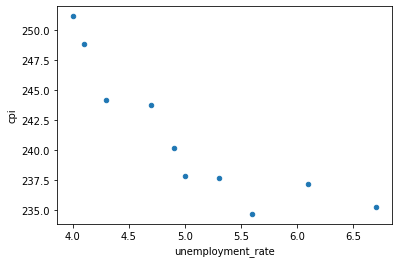

In [79]:
inflation_unemploy = pd.merge_ordered(inflation, unemployment, on = 'date', how = 'inner')
print(inflation_unemploy)

inflation_unemploy.plot(x = 'unemployment_rate', y = 'cpi', kind = 'scatter')
plt.show()

#### Example

In [80]:
d = {
'date':[pd.Timestamp('1990-01-01 00:00:00'), pd.Timestamp('1991-01-01 00:00:00'), pd.Timestamp('1992-01-01 00:00:00'), pd.Timestamp('1993-01-01 00:00:00'), pd.Timestamp('1990-01-01 00:00:00'), pd.Timestamp('1991-01-01 00:00:00'), pd.Timestamp('1992-01-01 00:00:00'), pd.Timestamp('1993-01-01 00:00:00')],
'country':['Australia', 'Australia', 'Australia', 'Australia', 'Sweden', 'Sweden', 'Sweden', 'Sweden'],
'pop':[17065100, 17284000, 17495000, 17667000, 8558835, 8617375, 8668067, 8718561],
'series_code':['SP.POP.TOTL', 'SP.POP.TOTL', 'SP.POP.TOTL', 'SP.POP.TOTL', 'SP.POP.TOTL', 'SP.POP.TOTL', 'SP.POP.TOTL', 'SP.POP.TOTL']
}

pop = pd.DataFrame(d)

d = {
'date':[pd.Timestamp('1990-01-01 00:00:00'), pd.Timestamp('1990-04-01 00:00:00'), pd.Timestamp('1990-07-01 00:00:00'), pd.Timestamp('1990-09-01 00:00:00'), pd.Timestamp('1991-01-01 00:00:00'), pd.Timestamp('1991-04-01 00:00:00'), pd.Timestamp('1991-07-01 00:00:00'), pd.Timestamp('1991-09-01 00:00:00'), pd.Timestamp('1992-01-01 00:00:00'), pd.Timestamp('1992-04-01 00:00:00'), pd.Timestamp('1992-07-01 00:00:00'), pd.Timestamp('1992-09-01 00:00:00'), pd.Timestamp('1993-01-01 00:00:00'), pd.Timestamp('1993-04-01 00:00:00'), pd.Timestamp('1993-07-01 00:00:00'), pd.Timestamp('1993-09-01 00:00:00'), pd.Timestamp('1990-01-01 00:00:00'), pd.Timestamp('1990-04-01 00:00:00'), pd.Timestamp('1990-07-01 00:00:00'), pd.Timestamp('1990-09-01 00:00:00'), pd.Timestamp('1991-01-01 00:00:00'), pd.Timestamp('1991-04-01 00:00:00'), pd.Timestamp('1991-07-01 00:00:00'), pd.Timestamp('1991-09-01 00:00:00'), pd.Timestamp('1992-01-01 00:00:00'), pd.Timestamp('1992-04-01 00:00:00'), pd.Timestamp('1992-07-01 00:00:00'), pd.Timestamp('1992-09-01 00:00:00'), pd.Timestamp('1993-01-01 00:00:00'), pd.Timestamp('1993-04-01 00:00:00'), pd.Timestamp('1993-07-01 00:00:00'), pd.Timestamp('1993-09-01 00:00:00')],
'country':['Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden'],
'gdp':[158051.1324, 158263.5816, 157329.279, 158240.6781, 156195.9535, 155989.0327, 156635.8576, 156744.0566, 157916.0811, 159047.8271, 160658.176, 163960.2207, 165097.4951, 166027.059, 166203.1786, 169279.3479, 79837.84599, 80582.28597000001, 79974.36017, 80106.49738, 79524.24192, 79073.05901, 79084.77036000001, 79740.60625, 79390.92175, 79060.28297999999, 78904.60477, 76996.83684, 75783.58777, 76708.54823, 77662.01816, 77703.30364],
'series_code':['NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD', 'NYGDPMKTPSAKD']
}

gdp = pd.DataFrame(d)

In [84]:
ctry_date = pd.merge_ordered(gdp, pop, on = ['date', 'country']
                             ,fill_method='ffill'
                            )
ctry_date

,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01,Australia,158051.13240,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,1990-01-01,Sweden,79837.84599,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
2,1990-04-01,Australia,158263.58160,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
3,1990-04-01,Sweden,80582.28597,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
4,1990-07-01,Australia,157329.27900,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
5,1990-07-01,Sweden,79974.36017,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
6,1990-09-01,Australia,158240.67810,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
7,1990-09-01,Sweden,80106.49738,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
8,1991-01-01,Australia,156195.95350,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
9,1991-01-01,Sweden,79524.24192,NYGDPMKTPSAKD,8617375,SP.POP.TOTL


In [82]:
date_ctry = pd.merge_ordered(gdp, pop, on = ['country', 'date'], 
                             fill_method='ffill')
date_ctry

,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01,Australia,158051.13240,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,1990-04-01,Australia,158263.58160,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
2,1990-07-01,Australia,157329.27900,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
3,1990-09-01,Australia,158240.67810,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
4,1991-01-01,Australia,156195.95350,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
5,1991-04-01,Australia,155989.03270,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
6,1991-07-01,Australia,156635.85760,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
7,1991-09-01,Australia,156744.05660,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
8,1992-01-01,Australia,157916.08110,NYGDPMKTPSAKD,17495000,SP.POP.TOTL
9,1992-04-01,Australia,159047.82710,NYGDPMKTPSAKD,17495000,SP.POP.TOTL


merge_ordered() caution, when join on multiple columns.

#### pd.merge_asof()

In [86]:
d = {
'date_time':[pd.Timestamp('2017-11-17 15:35:17'), pd.Timestamp('2017-11-17 15:40:04'), pd.Timestamp('2017-11-17 15:45:01'), pd.Timestamp('2017-11-17 15:50:55'), pd.Timestamp('2017-11-17 15:55:00'), pd.Timestamp('2017-11-17 16:00:30'), pd.Timestamp('2017-11-17 16:05:07'), pd.Timestamp('2017-11-17 16:10:08'), pd.Timestamp('2017-11-17 16:15:11'), pd.Timestamp('2017-11-17 16:20:29'), pd.Timestamp('2017-11-17 16:25:25'), pd.Timestamp('2017-11-17 16:30:53'), pd.Timestamp('2017-11-17 16:35:11'), pd.Timestamp('2017-11-17 16:40:44'), pd.Timestamp('2017-11-17 16:45:52'), pd.Timestamp('2017-11-17 16:50:37'), pd.Timestamp('2017-11-17 16:55:02')],
'close':[98.12, 98.18, 97.7307, 97.74, 97.815, 98.02, 97.8, 97.84, 97.71, 97.76, 97.82, 97.95, 97.99, 98.06, 98.05, 98.1101, 98.18]
}
jpm = pd.DataFrame(d)

d = {
'date_time':[pd.Timestamp('2017-11-17 15:35:08'), pd.Timestamp('2017-11-17 15:40:00'), pd.Timestamp('2017-11-17 15:45:32'), pd.Timestamp('2017-11-17 15:50:07'), pd.Timestamp('2017-11-17 15:55:00'), pd.Timestamp('2017-11-17 16:00:30'), pd.Timestamp('2017-11-17 16:05:52'), pd.Timestamp('2017-11-17 16:10:22'), pd.Timestamp('2017-11-17 16:15:43'), pd.Timestamp('2017-11-17 16:20:07'), pd.Timestamp('2017-11-17 16:25:13'), pd.Timestamp('2017-11-17 16:30:04'), pd.Timestamp('2017-11-17 16:35:32'), pd.Timestamp('2017-11-17 16:40:09'), pd.Timestamp('2017-11-17 16:45:24'), pd.Timestamp('2017-11-17 16:50:28'), pd.Timestamp('2017-11-17 16:55:42')],
'close':[54.3227, 54.32, 54.19, 54.17, 54.1841, 54.265, 54.2, 54.155, 54.19, 54.205, 54.23, 54.22, 54.22, 54.28, 54.24, 54.17, 54.18]
}
wells = pd.DataFrame(d)

d = {
'date_time':[pd.Timestamp('2017-11-17 15:35:17'), pd.Timestamp('2017-11-17 15:40:06'), pd.Timestamp('2017-11-17 15:45:05'), pd.Timestamp('2017-11-17 15:50:34'), pd.Timestamp('2017-11-17 15:55:06'), pd.Timestamp('2017-11-17 16:00:18'), pd.Timestamp('2017-11-17 16:05:20'), pd.Timestamp('2017-11-17 16:10:05'), pd.Timestamp('2017-11-17 16:15:07'), pd.Timestamp('2017-11-17 16:20:29'), pd.Timestamp('2017-11-17 16:25:00'), pd.Timestamp('2017-11-17 16:30:18'), pd.Timestamp('2017-11-17 16:35:08'), pd.Timestamp('2017-11-17 16:40:46'), pd.Timestamp('2017-11-17 16:45:55'), pd.Timestamp('2017-11-17 16:50:05'), pd.Timestamp('2017-11-17 16:55:02')],
'close':[26.552, 26.552, 26.388, 26.378, 26.383000000000003, 26.451999999999998, 26.373, 26.388, 26.369, 26.388, 26.467, 26.482, 26.491999999999997, 26.526999999999997, 26.522, 26.546999999999997, 26.566999999999997]
}
bac = pd.DataFrame(d)

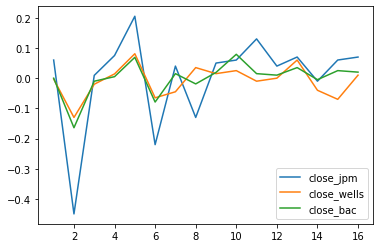

In [87]:
jpm_wells = pd.merge_asof(jpm, wells, on='date_time', 
                          suffixes=('', '_wells'), direction='nearest')
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on='date_time', 
                              suffixes=('_jpm', '_bac'), direction='nearest')
price_diffs = jpm_wells_bac.diff()

price_diffs.plot(y=['close_jpm','close_wells','close_bac'])
plt.show()

#### .query

#### Example

In [90]:
gdp_pop = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')
gdp_pop

,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01,Australia,158051.13240,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,1990-04-01,Australia,158263.58160,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
2,1990-07-01,Australia,157329.27900,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
3,1990-09-01,Australia,158240.67810,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
4,1991-01-01,Australia,156195.95350,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
5,1991-04-01,Australia,155989.03270,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
6,1991-07-01,Australia,156635.85760,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
7,1991-09-01,Australia,156744.05660,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
8,1992-01-01,Australia,157916.08110,NYGDPMKTPSAKD,17495000,SP.POP.TOTL
9,1992-04-01,Australia,159047.82710,NYGDPMKTPSAKD,17495000,SP.POP.TOTL


In [92]:
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']
print(gdp_pop)
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'date', 'country')
print(gdp_pivot)

         date    country           gdp  series_code_x       pop series_code_y  \
0  1990-01-01  Australia  158051.13240  NYGDPMKTPSAKD  17065100   SP.POP.TOTL   
1  1990-04-01  Australia  158263.58160  NYGDPMKTPSAKD  17065100   SP.POP.TOTL   
2  1990-07-01  Australia  157329.27900  NYGDPMKTPSAKD  17065100   SP.POP.TOTL   
3  1990-09-01  Australia  158240.67810  NYGDPMKTPSAKD  17065100   SP.POP.TOTL   
4  1991-01-01  Australia  156195.95350  NYGDPMKTPSAKD  17284000   SP.POP.TOTL   
5  1991-04-01  Australia  155989.03270  NYGDPMKTPSAKD  17284000   SP.POP.TOTL   
6  1991-07-01  Australia  156635.85760  NYGDPMKTPSAKD  17284000   SP.POP.TOTL   
7  1991-09-01  Australia  156744.05660  NYGDPMKTPSAKD  17284000   SP.POP.TOTL   
8  1992-01-01  Australia  157916.08110  NYGDPMKTPSAKD  17495000   SP.POP.TOTL   
9  1992-04-01  Australia  159047.82710  NYGDPMKTPSAKD  17495000   SP.POP.TOTL   
10 1992-07-01  Australia  160658.17600  NYGDPMKTPSAKD  17495000   SP.POP.TOTL   
11 1992-09-01  Australia  16

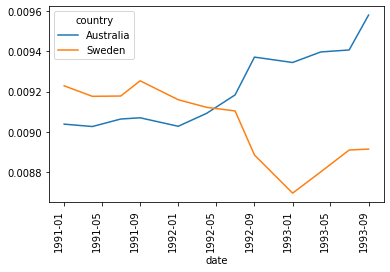

In [93]:
recent_gdp_pop = gdp_pivot.query('date >= "1991-01-01"')

recent_gdp_pop.plot(rot=90)
plt.show()